## CREDIT RISK CASE STUDY

### Introduction
Pada proyek kali ini saya mencoba mengerjakan proyek Credit Risk.

Credit risk adalah risiko yang harus ditanggung oleh sebuah bank atau lembaga pembiayaan lain ketika memberikan pinjaman ke seorang individu atau lembaga lain. Risiko ini berupa tidak bisa dibayarkannya pokok dan bunga pinjaman, sehingga mengakibatkan kerugian berikut:

* Gangguan aliran kas (cash flow) sehingga modal kerja terganggu.
* Meningkatkan biaya operasional untuk mengejar pembayaran tersebut (collection).

Untuk memperkecil risiko kredit ini, biasanya dilakukan proses penilaian risiko sebelum diberikan pinjaman yang disebut dengan credit scoring dan credit rating terhadap pihak peminjam.


Meminimalkan risiko gagal bayar merupakan perhatian utama bagi lembaga keuangan. Untuk alasan ini, bank komersial dan investasi, dana modal ventura, perusahaan manajemen aset dan perusahaan asuransi, untuk beberapa nama, semakin mengandalkan teknologi untuk memprediksi klien mana yang lebih rentan untuk tidak membayar hutang mereka.

Machine Learning Model dapat membantu perusahaan-perusahaan ini untuk meningkatkan akurasi analisis risiko kredit mereka,dengan menyediakan metode ilmiah untuk mengidentifikasi calon debitur terlebih dahulu.

## Data Analysis / Data Preparation dan Preprocessing

In [ ]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/Rakamin Virtual Internship/loan_data_2007_2014.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# cek dataframe shape
print ('Jumlah Baris : ', df.shape[0])
print ('Jumlah Kolom : ', df.shape[1])

Jumlah Baris :  466285
Jumlah Kolom :  75


In [ ]:
#dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
# membuat satu kolom baru dari kolom 'loan_status' yang akan menjadi target variabel
df['good_bad'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                                             'Does not meet the credit policy. Status:Charged Off']), 0, 1)

# menghapus kolom asli 'loan_status'
df.drop(columns = ['loan_status'], inplace = True)

In [ ]:
X = df.drop('good_bad', axis = 1)
y = df['good_bad']

In [ ]:
# cek shape data 
X.shape

(466285, 74)

In [ ]:
# melihat 5 data pertama
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,good_bad
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


mengecek missing value tiap kolom

In [ ]:
#show columns that have more than 70% missing values
missing_values = df.isnull().mean()
missing_values[missing_values>0.7]

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

kolom dengan missing value lebih dari 70% akan di hapus karena kalo di imputasi pun akan menebabkan ketidak akuratan.

In [ ]:
#menghapus kolom dan baris yang tidak relevan dan terdapat banyak missing value
df.drop(labels=['Unnamed: 0','id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code',
                       'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee',
                       'desc', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
                       'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                       'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code'], axis=1, inplace=True)

df.dropna(inplace=True)

In [ ]:
#cek lagi data shape nya
df.shape

(181686, 41)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5]), <a list of 14 Text major ticklabel objects>)

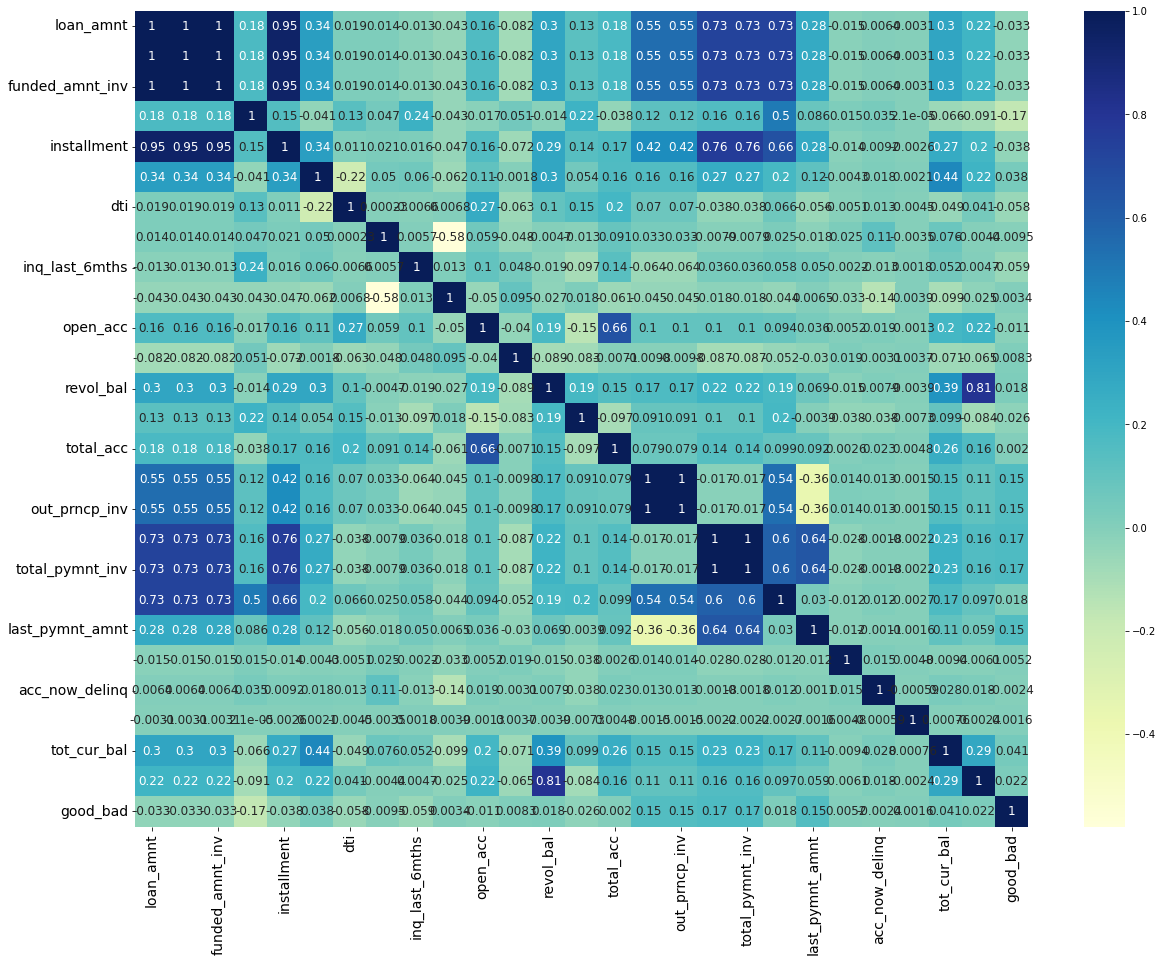

In [ ]:
# visualisasi matriks korelasi yang menunjukkan koefisien korelasi antar variabel dg heatmap
corr_matrix = df.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [ ]:
# menghapus multicollinear features 
df.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv',
                   'installment',  'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 <a list of 19 Text major ticklabel objects>)

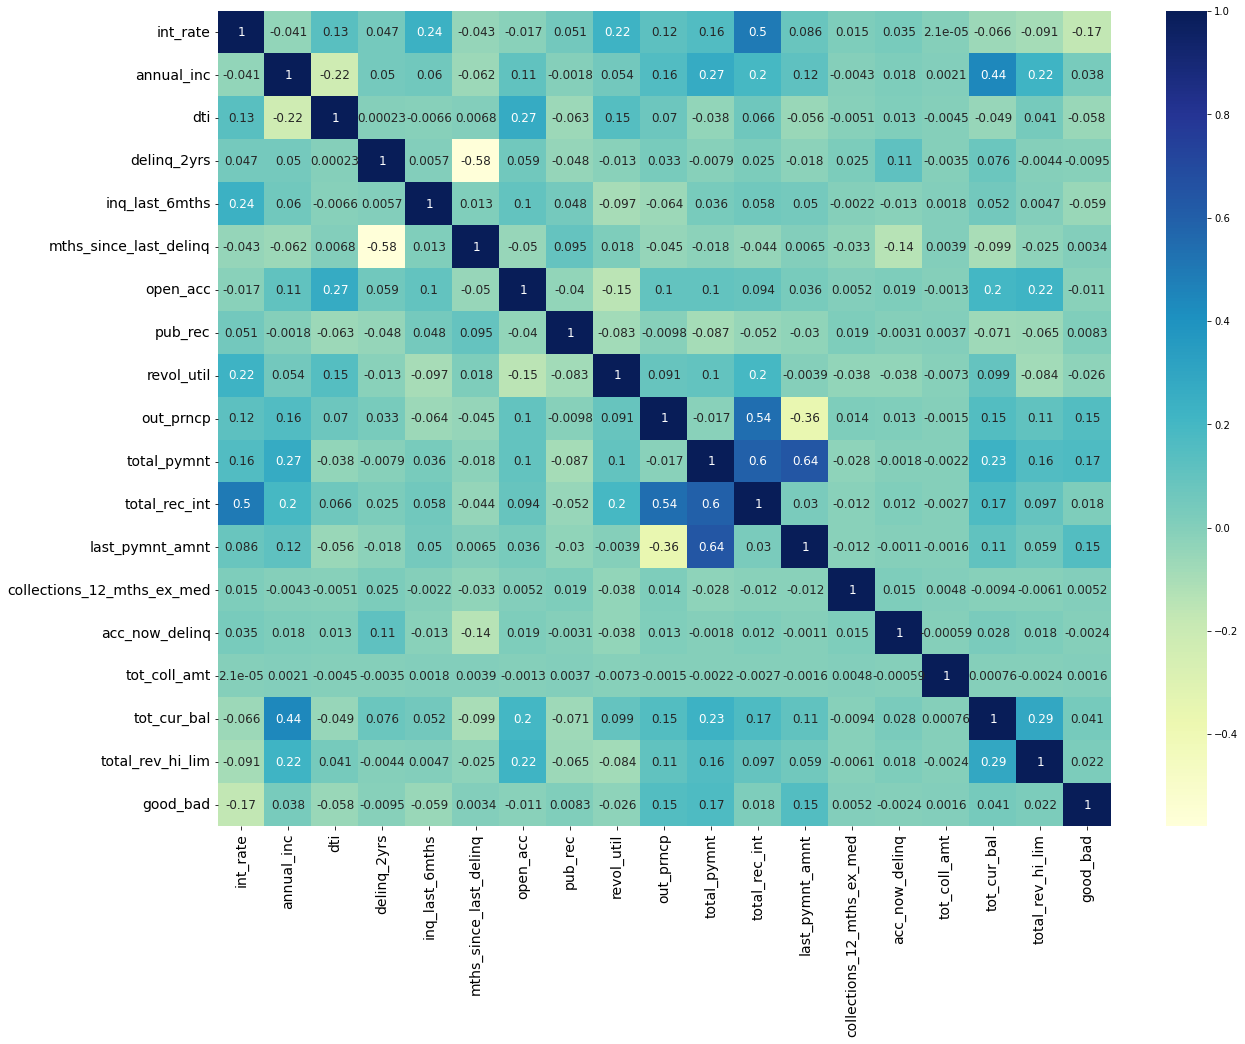

In [ ]:
corr_matrix = df.corr()
heatMap=sns.heatmap(corr_matrix, annot=True,  cmap="YlGnBu", annot_kws={'size':12})
heatmap=plt.gcf()
heatmap.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [ ]:
df.shape

(181686, 33)

In [ ]:
#statistik deskriptif
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
count,181686.000000,1.816860e+05,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,181686.000000,1.816860e+05,1.816860e+05,1.816860e+05,181686.000000
mean,14.449868,7.886698e+04,17.389873,0.638040,0.822942,33.724167,11.756382,0.189244,56.548318,5291.496180,11215.608032,2679.857733,3146.519033,0.016418,0.009808,3.263843e+02,1.505644e+05,2.735155e+04,0.901897
std,4.252272,6.078531e+04,7.787230,1.104461,1.059299,21.716923,4.997763,0.557625,22.583195,6660.857513,7986.951463,2470.226061,5633.250884,0.149082,0.107319,2.157745e+04,1.595617e+05,4.243696e+04,0.297455
min,6.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,35.690000,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+02,0.000000
25%,11.670000,5.000000e+04,11.530000,0.000000,0.000000,15.000000,8.000000,0.000000,40.300000,0.000000,5485.875000,1037.310000,321.130000,0.000000,0.000000,0.000000e+00,3.245125e+04,1.230000e+04,1.000000
50%,14.160000,6.800000e+04,16.910000,0.000000,0.000000,30.000000,11.000000,0.000000,57.400000,2637.215000,9127.115000,1925.520000,539.810000,0.000000,0.000000,0.000000e+00,9.847150e+04,2.060000e+04,1.000000
75%,17.140000,9.402825e+04,22.900000,1.000000,1.000000,49.000000,14.000000,0.000000,73.900000,8883.127500,14685.300000,3432.090000,3048.777500,0.000000,0.000000,0.000000e+00,2.255148e+05,3.400000e+04,1.000000
max,26.060000,7.500000e+06,39.990000,29.000000,7.000000,188.000000,84.000000,21.000000,892.300000,31898.770000,56087.909920,21840.000000,36170.140000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


In [ ]:
#mengecek tipe data lagi
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        181686 non-null  object 
 1   int_rate                    181686 non-null  float64
 2   grade                       181686 non-null  object 
 3   emp_length                  181686 non-null  object 
 4   home_ownership              181686 non-null  object 
 5   annual_inc                  181686 non-null  float64
 6   verification_status         181686 non-null  object 
 7   issue_d                     181686 non-null  object 
 8   pymnt_plan                  181686 non-null  object 
 9   purpose                     181686 non-null  object 
 10  addr_state                  181686 non-null  object 
 11  dti                         181686 non-null  float64
 12  delinq_2yrs                 181686 non-null  float64
 13  earliest_c

Variabel : mp_length, term, issue_d, last_pymnt_d, last_credit_pull_d dan earliest_cr_line  tidak dalam tipe data yang sesuai dan harus di treatment.

In [ ]:
# converting kolom emp_length ke tipe data numerik dan assign nan values ke 0

def emp_length_convert(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)
    

emp_length_convert(df, 'emp_length')

df['emp_length'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


array([10,  2,  4,  7,  6,  5,  8,  3,  1,  0,  9])

In [ ]:
#cek lagi tipe data emp_length nya
df['emp_length'].dtype

dtype('int64')

In [ ]:
# converting term column ke tipe data numerik

def term_numeric(df, column):
    df[column] = pd.to_numeric(df[column].str.replace(' months', ''))
    
term_numeric(df, 'term')


In [ ]:
df['term'].dtype

dtype('int64')

In [ ]:
# preprocessing kolom tanggal

def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)
    

date_columns(df, 'issue_d')
date_columns(df, 'last_pymnt_d')
date_columns(df, 'last_credit_pull_d')
date_columns(df, 'earliest_cr_line')

In [ ]:
# mengecek missing value lagi

missing_values = df.isnull().sum()
missing_values[missing_values>0]/len(df)

Series([], dtype: float64)

In [ ]:
# Memisahkan fitur kategorik dengan fitur numerik
categorical_features = df.select_dtypes(exclude='number')
numerical_features = df.select_dtypes(exclude='object')

In [ ]:
#mengecek tipe data fitur kategorik
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                181686 non-null  object
 1   home_ownership       181686 non-null  object
 2   verification_status  181686 non-null  object
 3   pymnt_plan           181686 non-null  object
 4   purpose              181686 non-null  object
 5   addr_state           181686 non-null  object
 6   initial_list_status  181686 non-null  object
 7   application_type     181686 non-null  object
dtypes: object(8)
memory usage: 12.5+ MB


In [ ]:
#mengecek tipe data fitur numerik
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           181686 non-null  int64  
 1   int_rate                       181686 non-null  float64
 2   emp_length                     181686 non-null  int64  
 3   annual_inc                     181686 non-null  float64
 4   dti                            181686 non-null  float64
 5   delinq_2yrs                    181686 non-null  float64
 6   inq_last_6mths                 181686 non-null  float64
 7   mths_since_last_delinq         181686 non-null  float64
 8   open_acc                       181686 non-null  float64
 9   pub_rec                        181686 non-null  float64
 10  revol_util                     181686 non-null  float64
 11  out_prncp                      181686 non-null  float64
 12  total_pymnt               

In [ ]:
# konversi ke dataframe 

filled_data = df

In [ ]:
#menampilkan 5 data teratas dari filled_data
filled_data.head()

,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,...,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,mths_since_earliest_cr_line
42537,36,6.62,A,10,MORTGAGE,105000.0,Not Verified,n,debt_consolidation,CT,...,INDIVIDUAL,0.0,0.0,267646.0,61100.0,1,80.0,55.0,55.0,317.0
42538,36,13.53,B,10,RENT,40000.0,Source Verified,n,debt_consolidation,NM,...,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,1,80.0,59.0,55.0,262.0
42539,36,8.90,A,2,MORTGAGE,63000.0,Not Verified,n,debt_consolidation,FL,...,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,1,80.0,55.0,55.0,269.0
42541,36,12.85,B,4,RENT,88000.0,Not Verified,n,debt_consolidation,NC,...,INDIVIDUAL,0.0,0.0,17672.0,4500.0,1,80.0,55.0,55.0,386.0
42543,36,9.67,B,7,MORTGAGE,102000.0,Not Verified,n,debt_consolidation,MA,...,INDIVIDUAL,0.0,0.0,39143.0,22300.0,1,80.0,55.0,55.0,370.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181686 entries, 42537 to 466284
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           181686 non-null  int64  
 1   int_rate                       181686 non-null  float64
 2   grade                          181686 non-null  object 
 3   emp_length                     181686 non-null  int64  
 4   home_ownership                 181686 non-null  object 
 5   annual_inc                     181686 non-null  float64
 6   verification_status            181686 non-null  object 
 7   pymnt_plan                     181686 non-null  object 
 8   purpose                        181686 non-null  object 
 9   addr_state                     181686 non-null  object 
 10  dti                            181686 non-null  float64
 11  delinq_2yrs                    181686 non-null  float64
 12  inq_last_6mths            

In [ ]:
preprocess_data = df

In [ ]:
#mengecek apakah ada missing value
missing = preprocess_data.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

akhirnya datanya bersih dari missing value

## Feature Engineering dan Selection

### Bining, menghitung Weight of Evidence (WoE), Information Value dan converting continous variables menjadi categorical

Weight of evidence (WoE) akan membantu kita menentukan kategori mana yang harus disatukan. Sedangkan Value Information akan membantu dalam menentukan variabel mana yang berguna untuk prediksi dalam model regresi logistik. Binning membantu kita mengubah variabel kontinu menjadi variabel kategoris.

In [ ]:
# mendefinisikan fungsi untuk menghitung weight of evidence dan information value

def iv_woe(data, target, bins=10, show_woe=False):
    
    #Dataframe kosong
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extrak nama kolom
    cols = data.columns
    
    #jalankan WOE dan IV pada semua independent variabel
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Tampilkan WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF
iv, woe = iv_woe(preprocess_data, target='good_bad', bins=20)

Information value of term is 0.035478
Information value of int_rate is 0.347724
Information value of grade is 0.281145
Information value of emp_length is 0.007174
Information value of home_ownership is 0.017952
Information value of annual_inc is 0.037998
Information value of verification_status is 0.033377
Information value of pymnt_plan is 0.000309
Information value of purpose is 0.028333
Information value of addr_state is 0.010291
Information value of dti is 0.041026
Information value of delinq_2yrs is 0.001039
Information value of inq_last_6mths is 0.040454
Information value of mths_since_last_delinq is 0.002487
Information value of open_acc is 0.004499
Information value of pub_rec is 0.000504
Information value of revol_util is 0.008858
Information value of initial_list_status is 0.011513
Information value of out_prncp is 0.703375
Information value of total_pymnt is 0.515794
Information value of total_rec_int is 0.011108
Information value of last_pymnt_amnt is 1.491828
Information v

In [ ]:
print(iv)

                        Variable        IV
0                           term  0.035478
0                       int_rate  0.347724
0                          grade  0.281145
0                     emp_length  0.007174
0                 home_ownership  0.017952
0                     annual_inc  0.037998
0            verification_status  0.033377
0                     pymnt_plan  0.000309
0                        purpose  0.028333
0                     addr_state  0.010291
0                            dti  0.041026
0                    delinq_2yrs  0.001039
0                 inq_last_6mths  0.040454
0         mths_since_last_delinq  0.002487
0                       open_acc  0.004499
0                        pub_rec  0.000504
0                     revol_util  0.008858
0            initial_list_status  0.011513
0                      out_prncp  0.703375
0                    total_pymnt  0.515794
0                  total_rec_int  0.011108
0                last_pymnt_amnt  1.491828
0     colle

The Rule of dumb menyatakan bahwa semua variabel dengan value information kurang dari 0,02 tidak berguna untuk prediksi dan nilai lebih besar dari 0,5 memiliki daya prediksi yang suspicious. 

Oleh karena itu, variabel seperti : out_prncp, last_pymnt_amnt, delinq_2thn, mths_since_last_delinq, open_acc, pub_rec, total_acc, collections_12_mths_ex_med, acc_now_delinq, tot_coll_amt dan mths_pymths tidak akan dimasukkan.

In [ ]:
# menghapus kolom dengan information value yang rendah
preprocess_data.drop(columns=[ 'pymnt_plan', 'last_pymnt_amnt', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq', 
                              'open_acc', 'pub_rec',  'collections_12_mths_ex_med', 'acc_now_delinq','tot_coll_amt',
                              'mths_since_last_pymnt_d', 'emp_length', 'application_type'], axis=1, inplace=True)

In [ ]:
preprocess_data.shape

(181686, 20)

In [ ]:
# membuat dummy variables untuk categorical kolom
data_dummies1 = [pd.get_dummies(preprocess_data['grade'], prefix='grade', prefix_sep=':'),
               pd.get_dummies(preprocess_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
               pd.get_dummies(preprocess_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                pd.get_dummies(preprocess_data['purpose'], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(preprocess_data['addr_state'], prefix='addr_state', prefix_sep=':'),
                pd.get_dummies(preprocess_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
                               
               ]

In [ ]:
# ubah  data_dummies menjadi dataframe

categorical_dummies = pd.concat(data_dummies1, axis=1)

In [ ]:
#cek 5 data teratas
categorical_dummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
42537,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42538,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42539,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42541,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42543,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# concatinating preprocess_data dengan categorical_dummies

preprocess_data = pd.concat([preprocess_data, categorical_dummies], axis=1)

In [ ]:
preprocess_data.shape

(181686, 98)

In [ ]:
preprocess_data.columns

Index(['term', 'int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'addr_state', 'dti', 'inq_last_6mths',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'tot_cur_bal', 'total_rev_hi_lim', 'good_bad', 'mths_since_issue_d',
       'mths_since_last_credit_pull_d', 'mths_since_earliest_cr_line',
       'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:ANY', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification_status:Source Verified', 'verification_status:Verified',
       'purpose:car', 'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:home_improvement', 'purpose:house', 'purpose:major_purchase',
       'purpose:medical', 'purpose:moving', 'purpose:other',
       'purpose:renewable_energy', 'purpose:small_busine

### Analisis Categorical Variables (variabel kategori)

In [ ]:
# membuat fungsi untuk menghitung woe of categorical features

def woe_categorical(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df


# function to plot woe values 
# We set the default style of the graphs to the seaborn style. 
sns.set()
# Below we define a function for plotting WoE across categories that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)    

In [ ]:
#memisahkan data menjadi target dan fitur
X= preprocess_data.drop(columns='good_bad', axis=1)
y=preprocess_data['good_bad']
df_grade = woe_categorical(X, 'grade', y)
df_grade

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,1396,0.746418,0.007684,1042.0,354.0,0.006359,0.019861,-1.138878,NaN,NaN,0.281145
1,F,5711,0.788303,0.031433,4502.0,1209.0,0.027474,0.067830,-0.903751,0.041885,0.235128,0.281145
2,E,15542,0.826856,0.085543,12851.0,2691.0,0.078426,0.150976,-0.654970,0.038553,0.248781,0.281145
3,D,33289,0.866472,0.183223,28844.0,4445.0,0.176026,0.249383,-0.348357,0.039616,0.306613,0.281145
4,C,53071,0.902791,0.292103,47912.0,5159.0,0.292392,0.289441,0.010144,0.036318,0.358501,0.281145
5,B,52738,0.936441,0.290270,49386.0,3352.0,0.301388,0.188061,0.471631,0.033650,0.461487,0.281145
6,A,19939,0.969206,0.109744,19325.0,614.0,0.117935,0.034448,1.230681,0.032766,0.759050,0.281145


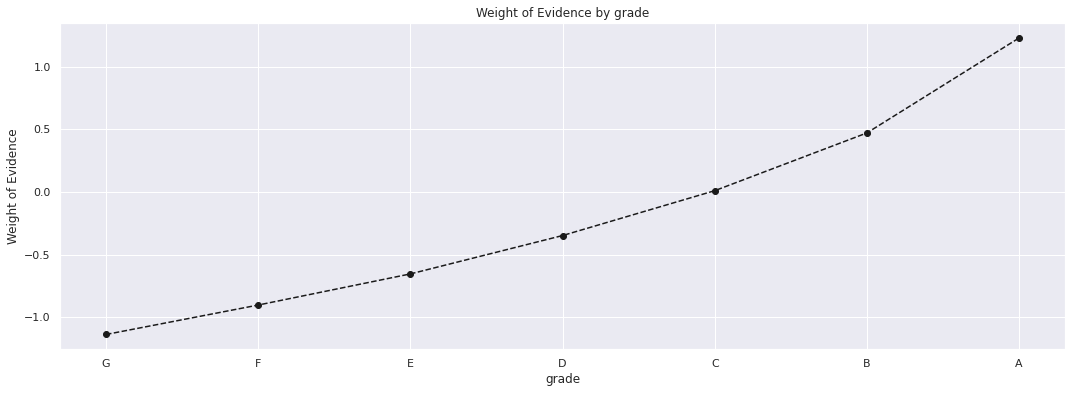

In [ ]:
#Menganalisis variabel grade
plot_by_woe(df_grade)

dari grafik di atas dapat kita lihat bahwa grades memiliki woe yang berbeda secara signifikan saat kita menilai perubahan. Oleh karena itu, kita akan menjaga setiap nilai sebagai fitur.

In [ ]:
#aanalisis variabel home_ownership 

df_home = woe_categorical(X, 'home_ownership', y)
df_home

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NONE,31,0.838710,0.000171,26.0,5.0,0.000159,0.000281,-0.569820,NaN,NaN,inf
1,RENT,66257,0.886563,0.364679,58741.0,7516.0,0.358478,0.421679,-0.162375,0.047853,0.407445,inf
2,OWN,15747,0.902267,0.086672,14208.0,1539.0,0.086707,0.086344,0.004194,0.015704,0.166568,inf
3,OTHER,21,0.904762,0.000116,19.0,2.0,0.000116,0.000112,0.032813,0.002495,0.028619,inf
4,MORTGAGE,99629,0.912054,0.548358,90867.0,8762.0,0.554534,0.491584,0.120494,0.007292,0.087681,inf
5,ANY,1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.087946,inf,inf


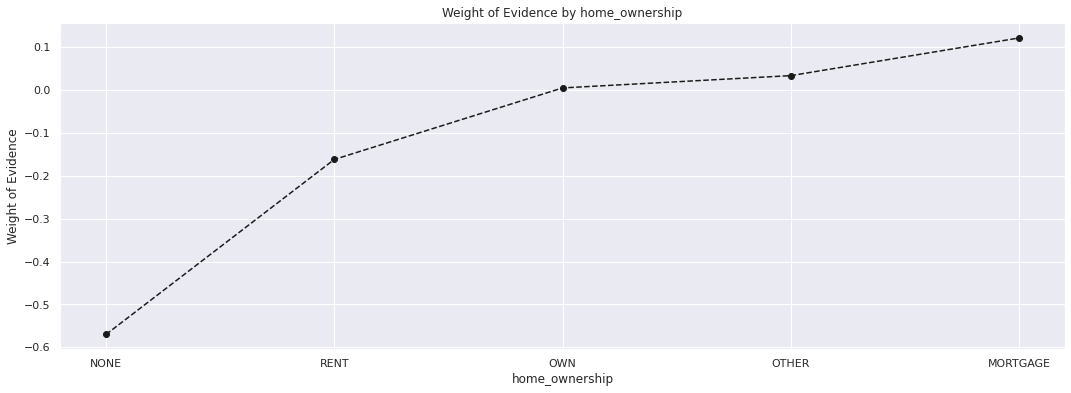

In [ ]:
#ploting woe
plot_by_woe(df_home)

OTHER, NONE dan ANY memiliki pengamatan yang sangat sedikit dan harus digabungkan dengan kategori dengan risiko gagal bayar yang tinggi yaitu RENT

In [ ]:
#Analisis verification_status

veri_df = woe_categorical(X, 'verification_status', y)
veri_df

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,60766,0.882089,0.334456,53601.0,7165.0,0.327111,0.401986,-0.206119,NaN,NaN,0.033377
1,Source Verified,64050,0.902826,0.352531,57826.0,6224.0,0.352895,0.349192,0.010547,0.020737,0.216666,0.033377
2,Not Verified,56870,0.922015,0.313013,52435.0,4435.0,0.319995,0.248822,0.251568,0.019189,0.241021,0.033377


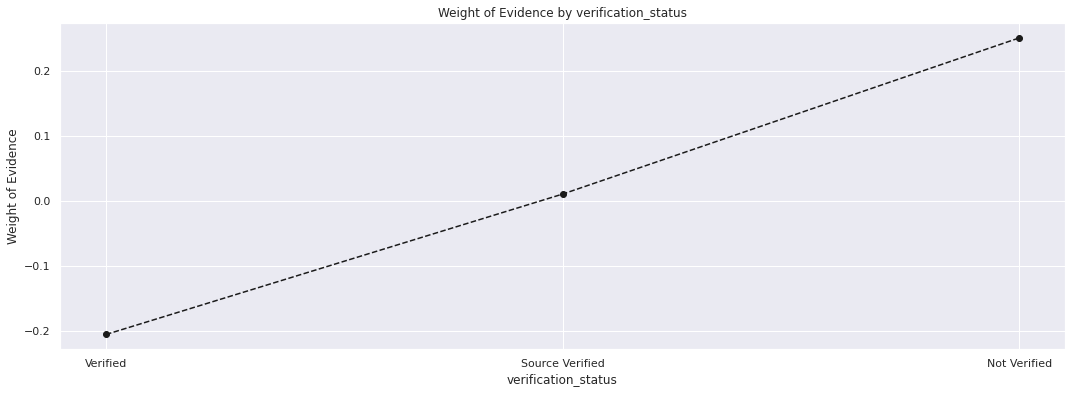

In [ ]:
#ploting woe
plot_by_woe(veri_df)

Variabel ini memiliki nilai WOE yang berbeda dan dapat digunakan sebagai variabel terpisah

In [ ]:
#analisis variabel purpose
pur_df = woe_categorical(X, 'purpose', y)
pur_df

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,2052,0.819688,0.011294,1682.0,370.0,0.010265,0.020759,-0.704243,NaN,NaN,0.028333
1,moving,976,0.851434,0.005372,831.0,145.0,0.005071,0.008135,-0.472583,0.031746,0.231660,0.028333
2,wedding,411,0.851582,0.002262,350.0,61.0,0.002136,0.003422,-0.471419,0.000147,0.001163,0.028333
3,renewable_energy,105,0.866667,0.000578,91.0,14.0,0.000555,0.000785,-0.346677,0.015085,0.124743,0.028333
4,house,769,0.875163,0.004233,673.0,96.0,0.004107,0.005386,-0.271082,0.008496,0.075595,0.028333
5,medical,1690,0.882249,0.009302,1491.0,199.0,0.009099,0.011165,-0.204581,0.007086,0.066500,0.028333
6,other,8328,0.888689,0.045837,7401.0,927.0,0.045166,0.052009,-0.141062,0.006440,0.063519,0.028333
7,debt_consolidation,112109,0.896841,0.617048,100544.0,11565.0,0.613589,0.648844,-0.055867,0.008153,0.085195,0.028333
8,home_improvement,11143,0.908104,0.061331,10119.0,1024.0,0.061753,0.057451,0.072220,0.011262,0.128086,0.028333
9,major_purchase,2991,0.912738,0.016462,2730.0,261.0,0.016660,0.014643,0.129058,0.004634,0.056838,0.028333


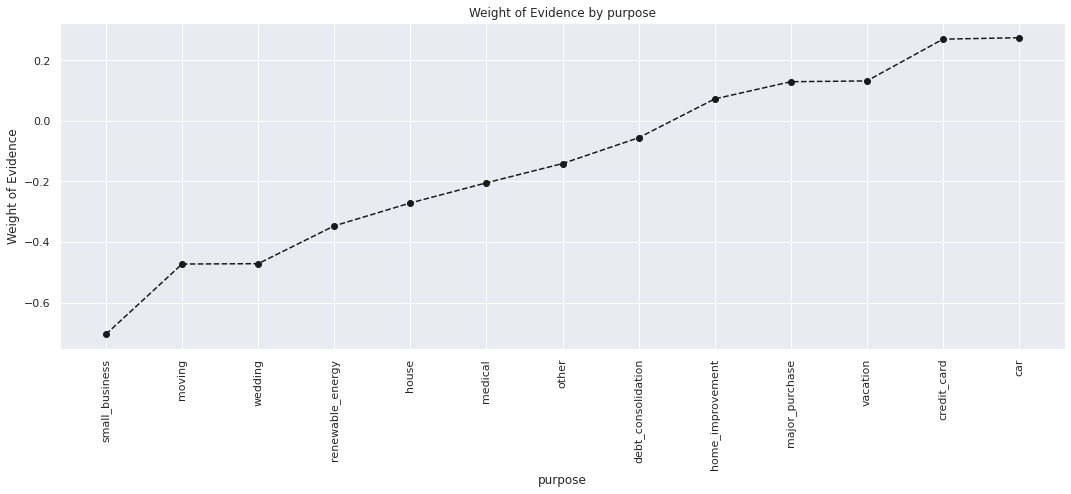

In [ ]:
#ploting woe
plot_by_woe(pur_df, 90)

Kategori berikut akan digabungkan bersama:


1. educational, renewable_energy, moving
2. other,house, medical
3. weeding, vacation
4. debt_consolidation
5. home_improvement, major purchase
6. car, credit_card

In [ ]:
# analisis addr_state

addr_df = woe_categorical(X, 'addr_state', y)
addr_df.head()

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,HI,1081,0.870490,0.005950,941.0,140.0,0.005743,0.007855,-0.313178,NaN,NaN,inf
1,NV,2560,0.888672,0.014090,2275.0,285.0,0.013884,0.015990,-0.141233,0.018182,0.171945,inf
2,AL,2360,0.889407,0.012989,2099.0,261.0,0.012810,0.014643,-0.133783,0.000735,0.007450,inf
3,OK,1534,0.890482,0.008443,1366.0,168.0,0.008336,0.009425,-0.122801,0.001076,0.010982,inf
4,VA,5737,0.890535,0.031576,5109.0,628.0,0.031179,0.035233,-0.122260,0.000053,0.000541,inf


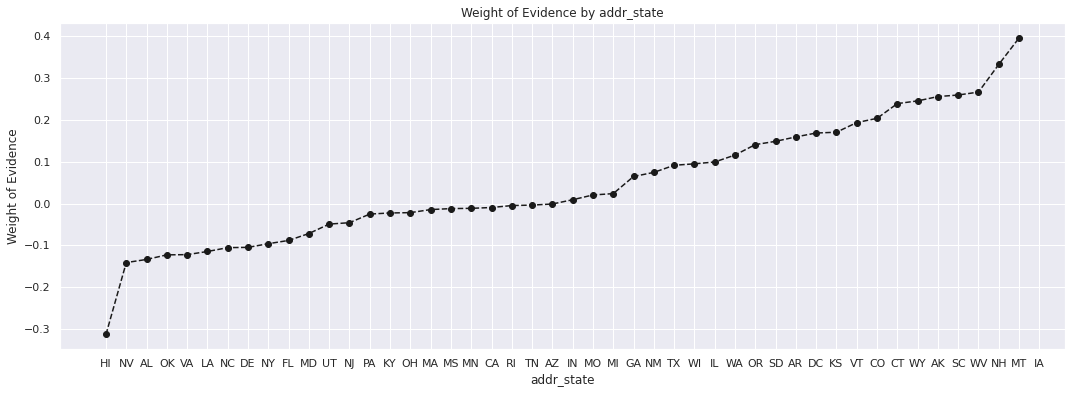

In [ ]:
plot_by_woe(addr_df)

Negara bagian NE, IA, ME dan ID memiliki pengamatan yang rendah dan ini mungkin menjadi alasan woe ekstrem mereka. kita akan memplot grafik lagi tanpa memasukkan kategori ini dan melihat apakah ada perubahan.

In [ ]:
#dataframe tidak termasuk pengamatan rendah untuk kolom addr_state
data1 =addr_df.iloc[2:44, :]
data2 =addr_df.iloc[45:49, :]
low_data_woe = pd.concat([data1, data2], axis=0)

In [ ]:
low_data_woe

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
2,AL,2360,0.889407,0.012989,2099.0,261.0,0.012810,0.014643,-0.133783,0.000735,0.007450,inf
3,OK,1534,0.890482,0.008443,1366.0,168.0,0.008336,0.009425,-0.122801,0.001076,0.010982,inf
4,VA,5737,0.890535,0.031576,5109.0,628.0,0.031179,0.035233,-0.122260,0.000053,0.000541,inf
5,LA,2152,0.891264,0.011845,1918.0,234.0,0.011705,0.013128,-0.114762,0.000729,0.007498,inf
6,NC,4933,0.892155,0.027151,4401.0,532.0,0.026858,0.029847,-0.105535,0.000891,0.009226,inf
7,DE,501,0.892216,0.002758,447.0,54.0,0.002728,0.003030,-0.104904,0.000061,0.000631,inf
8,NY,14924,0.893058,0.082142,13328.0,1596.0,0.081337,0.089542,-0.096112,0.000843,0.008792,inf
9,FL,11968,0.893800,0.065872,10697.0,1271.0,0.065281,0.071308,-0.088319,0.000742,0.007793,inf
10,MD,4568,0.895359,0.025142,4090.0,478.0,0.024960,0.026818,-0.071789,0.001559,0.016530,inf
11,UT,1336,0.897455,0.007353,1199.0,137.0,0.007317,0.007686,-0.049217,0.002096,0.022573,inf


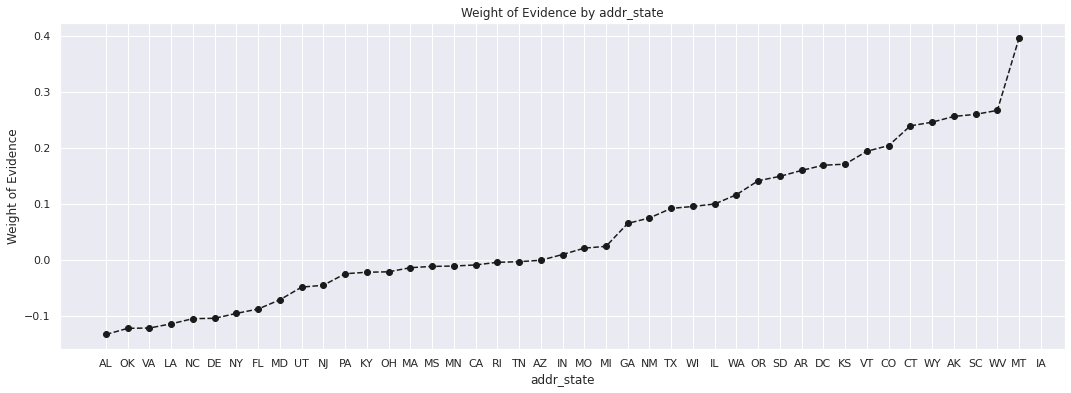

In [ ]:
#ploting addr_state dg mengecualikan states dengan observasi rendah
plot_by_woe(low_data_woe)

Dalam memutuskan kategori mana yang akan digabungkan, Kita menggunakan WOE dan number of observation dalam analisis ini. Kategori dengan WOE serupa tetapi observation berbeda nyata dengan tidak digabungkan bersama. Pasalnya, jumlah observasi dapat mempengaruhi nilai WOE. Juga, kategori dengan WOE serupa dan pengamatan lebih besar dari 5% dapat digabungkan bersama untuk membentuk kategori baru. Proses ini akan digunakan untuk analisis selanjutnya. Kategori yang akan digabungkan sebagai berikut:

1. NE, IA, NV, HI, FL, AL
2. NY
3. LA, NM, OK, NC, MO, MD, NJ, VA
4. CA
5. AZ, MI, UT, TN, AR, PA
6. RI, OH, KY, DE, MN, SD, MA, IN
7. GA, WA
8. WI, ATAU
9. TX
10. IL, CT, MT
11. CO, SC
12. KS, VT, AK, MS
13. NH, WV, WY, DC

Secara total kita harus membuat 13 kategori untuk addr_variable. Membuat variabel-variabel ini nanti. Mari kita lanjutkan untuk menganalisis fitur lainnya.

In [ ]:
# analisis initial_list_status 

init_list_df = woe_categorical( X, 'initial_list_status', y)
init_list_df

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,106064,0.893951,0.583776,94816.0,11248.0,0.578633,0.631059,-0.086731,NaN,NaN,0.011513
1,w,75622,0.913041,0.416224,69046.0,6576.0,0.421367,0.368941,0.132868,0.01909,0.219598,0.011513


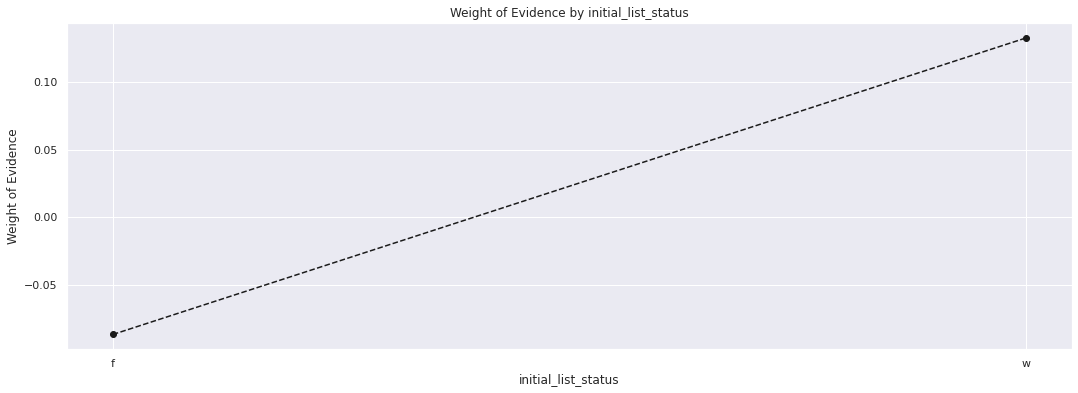

In [ ]:
plot_by_woe(init_list_df)

Variabel ini memiliki nilai WOE yang berbeda secara signifikan dan kategori harus disimpan sebagai variabel terpisah

### Analisis Continous Variables (variabel numerik)

In [ ]:
# fungsi untuk menghitung WOE untuk continous variables
def woe_continous(df, cat_feature, good_bad_df):
    df = pd.concat([df[cat_feature], good_bad_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#     df = df.sort_values(['WoE'])
#     df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

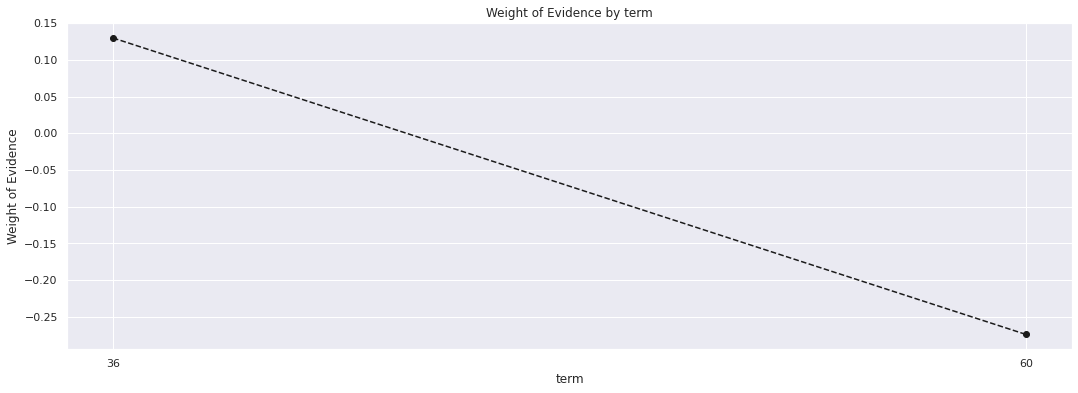

In [ ]:
#analisis variable / kolom term 
plot_by_woe(woe_continous(X,'term', y ))

In [ ]:
# mengecek jumlah nilai yang unik untuk kolom 'mths_since_issue_d'
X['mths_since_issue_d'].unique()

array([80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
       93., 94., 95., 96., 68., 69., 70., 71., 72., 73., 74., 75., 76.,
       77., 78., 79.])

In [ ]:
# fine classing dengan membuat variabel baru

X['mths_since_issue_d_factor'] = pd.cut(X['mths_since_issue_d'], 10)

In [ ]:
mths_since_iss_df = woe_continous(X, 'mths_since_issue_d_factor', y)
mths_since_iss_df

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(67.972, 70.8]",36486,0.938141,0.200819,34229.0,2257.0,0.208889,0.126627,0.500558,NaN,NaN,0.087677
1,"(70.8, 73.6]",28044,0.917273,0.154354,25724.0,2320.0,0.156986,0.130162,0.187378,0.020868,0.313180,0.087677
2,"(73.6, 76.4]",26305,0.908002,0.144783,23885.0,2420.0,0.145763,0.135772,0.071004,0.009271,0.116374,0.087677
3,"(76.4, 79.2]",22738,0.900035,0.125150,20465.0,2273.0,0.124892,0.127525,-0.020863,0.007967,0.091868,0.087677
4,"(79.2, 82.0]",19484,0.892425,0.107240,17388.0,2096.0,0.106114,0.117594,-0.102729,0.007611,0.081866,0.087677
5,"(82.0, 84.8]",10753,0.885427,0.059185,9521.0,1232.0,0.058104,0.069120,-0.173618,0.006997,0.070889,0.087677
6,"(84.8, 87.6]",13611,0.867901,0.074915,11813.0,1798.0,0.072091,0.100875,-0.335953,0.017526,0.162335,0.087677
7,"(87.6, 90.4]",9304,0.868121,0.051209,8077.0,1227.0,0.049291,0.068840,-0.334030,0.000220,0.001923,0.087677
8,"(90.4, 93.2]",10186,0.858237,0.056064,8742.0,1444.0,0.053350,0.081014,-0.417757,0.009884,0.083726,0.087677
9,"(93.2, 96.0]",4775,0.841466,0.026282,4018.0,757.0,0.024521,0.042471,-0.549302,0.016771,0.131546,0.087677


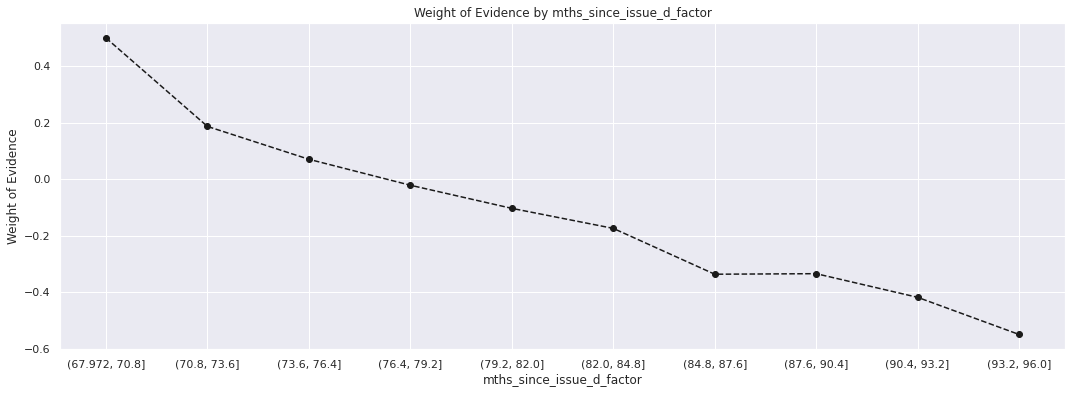

In [ ]:
plot_by_woe(mths_since_iss_df)

Kategori berikut akan dibuat berdasarkan WOE dan jumlah observasinya:

1. (67.97, 70.8)
2. (70.8, 73.6)
3. (73.6- 76.4)
4. (76.4.- 79.2)
5. (79.2-82)
6. 82-84
7. 84-90.4
8. 90.4-96 

In [ ]:
#Analisis intrest rate
X['int_rate_factor'] = pd.cut(X['int_rate'], 10)

In [ ]:
int_rate_df = woe_continous(X, 'int_rate_factor',y)
int_rate_df

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.98, 8.006]",12809,0.973456,0.070501,12469.0,340.0,0.076095,0.019075,1.383576,NaN,NaN,0.334023
1,"(8.006, 10.012]",14732,0.960426,0.081085,14149.0,583.0,0.086347,0.032709,0.970733,0.013030,0.412843,0.334023
2,"(10.012, 12.018]",25553,0.946503,0.140644,24186.0,1367.0,0.147600,0.076694,0.654677,0.013923,0.316057,0.334023
3,"(12.018, 14.024]",35241,0.923527,0.193967,32546.0,2695.0,0.198618,0.151201,0.272778,0.022977,0.381899,0.334023
4,"(14.024, 16.03]",34858,0.898158,0.191858,31308.0,3550.0,0.191063,0.199170,-0.041553,0.025368,0.314330,0.334023
5,"(16.03, 18.036]",22550,0.870022,0.124115,19619.0,2931.0,0.119729,0.164441,-0.317324,0.028136,0.275771,0.334023
6,"(18.036, 20.042]",17227,0.848203,0.094817,14612.0,2615.0,0.089173,0.146712,-0.497900,0.021819,0.180576,0.334023
7,"(20.042, 22.048]",8586,0.818891,0.047257,7031.0,1555.0,0.042908,0.087242,-0.709625,0.029312,0.211726,0.334023
8,"(22.048, 24.054]",5658,0.787204,0.031142,4454.0,1204.0,0.027181,0.067549,-0.910326,0.031687,0.200700,0.334023
9,"(24.054, 26.06]",4472,0.779964,0.024614,3488.0,984.0,0.021286,0.055206,-0.953021,0.007240,0.042695,0.334023


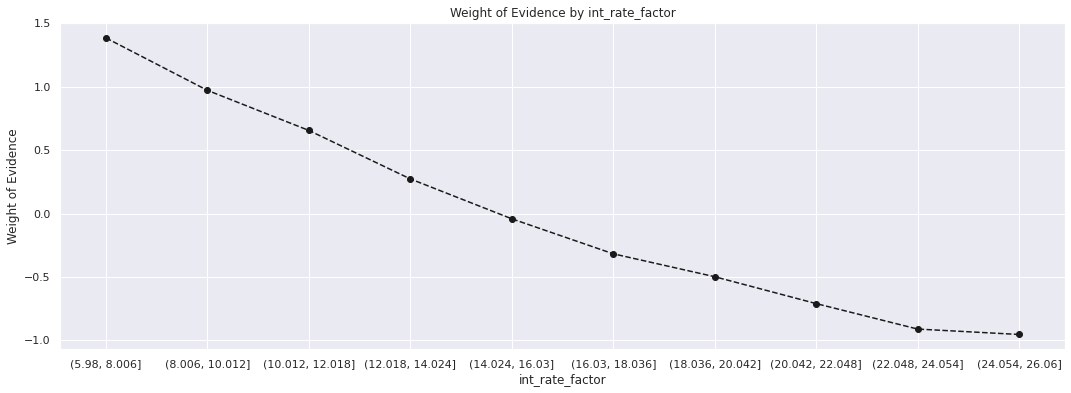

In [ ]:
plot_by_woe(int_rate_df)

Dari grafik di atas hanya dua kategori terakhir yang akan digabungkan. (22.048, 26)

In [ ]:
#Analisis tot_rec_int
X['total_rec_int_factor'] = pd.cut(X['total_rec_int'], 20)
rec_int_df = woe_continous(X, 'total_rec_int_factor', y)
rec_int_df

,total_rec_int_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-21.84, 1092.0]",48597,0.891495,0.267478,43324.0,5273.0,0.264393,0.295837,-0.112371,NaN,NaN,inf
1,"(1092.0, 2184.0]",52867,0.903834,0.290980,47783.0,5084.0,0.291605,0.285233,0.022093,0.012339,0.134464,inf
2,"(2184.0, 3276.0]",31823,0.906891,0.175154,28860.0,2963.0,0.176124,0.166237,0.057776,0.003057,0.035683,inf
3,"(3276.0, 4368.0]",16953,0.902554,0.093309,15301.0,1652.0,0.093377,0.092684,0.007453,0.004337,0.050323,inf
4,"(4368.0, 5460.0]",10593,0.909657,0.058304,9636.0,957.0,0.058806,0.053692,0.090979,0.007103,0.083526,inf
5,"(5460.0, 6552.0]",6923,0.903943,0.038104,6258.0,665.0,0.038191,0.037309,0.023350,0.005714,0.067629,inf
6,"(6552.0, 7644.0]",4601,0.909150,0.025324,4183.0,418.0,0.025528,0.023452,0.084824,0.005207,0.061474,inf
7,"(7644.0, 8736.0]",3110,0.905466,0.017117,2816.0,294.0,0.017185,0.016495,0.041014,0.003684,0.043810,inf
8,"(8736.0, 9828.0]",2113,0.909134,0.011630,1921.0,192.0,0.011723,0.010772,0.084627,0.003668,0.043613,inf
9,"(9828.0, 10920.0]",1414,0.917256,0.007783,1297.0,117.0,0.007915,0.006564,0.187157,0.008122,0.102529,inf


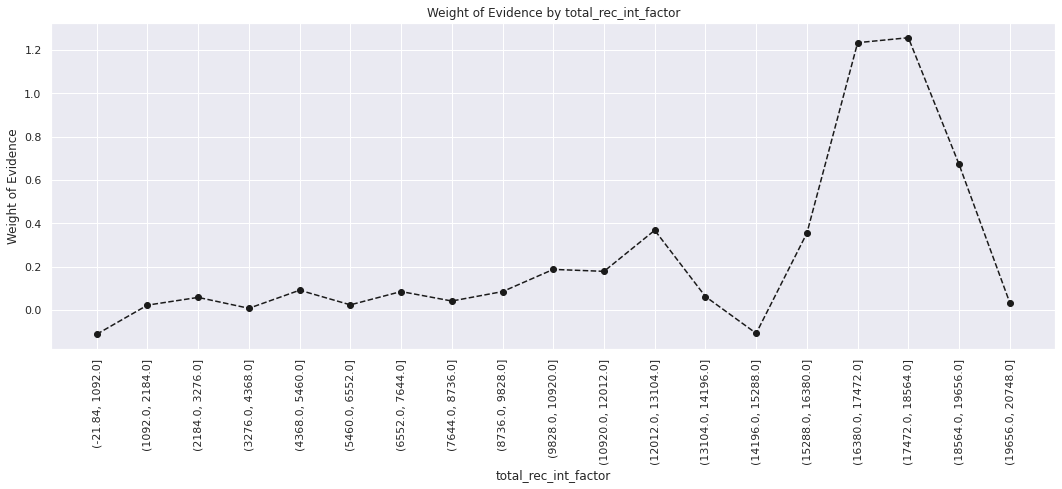

In [ ]:
plot_by_woe(rec_int_df, 90)

In [ ]:
#anlisis total_revol_hi_lim
X['total_rev_hi_lim_factor'] = pd.cut(X['total_rev_hi_lim'], 100)
revol_hi_df = woe_continous(X, 'total_rev_hi_lim_factor', y)
revol_hi_df

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9899.899, 100098.99]",178475,0.901157,0.982327,160834.0,17641.0,0.981521,0.989733,-0.008332,NaN,NaN,inf
1,"(100098.99, 200097.98]",2708,0.942762,0.014905,2553.0,155.0,0.015580,0.008696,0.583121,0.041605,0.591452,inf
2,"(200097.98, 300096.97]",351,0.945869,0.001932,332.0,19.0,0.002026,0.001066,0.642217,0.003107,0.059097,inf
3,"(300096.97, 400095.96]",102,0.921569,0.000561,94.0,8.0,0.000574,0.000449,0.245374,0.024300,0.396843,inf
4,"(400095.96, 500094.95]",27,1.000000,0.000149,27.0,0.0,0.000165,0.000000,inf,0.078431,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(9500004.05, 9600003.04]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(9600003.04, 9700002.03]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(9700002.03, 9800001.02]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(9800001.02, 9900000.01]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [ ]:
#analisis income dibawah 100.000
X_train_prepr_temp = X[X['total_rev_hi_lim'] <= 100000].copy()
# fine-classing lagi
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'],10)
# pastikan untuk memilih hanya indeks yang relevan di kolom target
df_temp = woe_continous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y[X_train_prepr_temp.index])
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.1, 10090.0]",32152,0.889307,0.180148,28593.0,3559.0,0.177780,0.201746,-0.126465,NaN,NaN,0.013952
1,"(10090.0, 20080.0]",55916,0.895361,0.313299,50065.0,5851.0,0.311284,0.331671,-0.063437,0.006054,0.063027,0.013952
2,"(20080.0, 30070.0]",37940,0.903031,0.212579,34261.0,3679.0,0.213021,0.208548,0.021220,0.007670,0.084657,0.013952
3,"(30070.0, 40060.0]",22348,0.904913,0.125216,20223.0,2125.0,0.125738,0.120458,0.042902,0.001882,0.021682,0.013952
4,"(40060.0, 50050.0]",13247,0.914924,0.074223,12120.0,1127.0,0.075357,0.063885,0.165151,0.010011,0.122249,0.013952
5,"(50050.0, 60040.0]",7296,0.915570,0.040880,6680.0,616.0,0.041534,0.034919,0.173479,0.000646,0.008329,0.013952
6,"(60040.0, 70030.0]",4381,0.926957,0.024547,4061.0,320.0,0.025250,0.018140,0.330716,0.011387,0.157237,0.013952
7,"(70030.0, 80020.0]",2534,0.922652,0.014198,2338.0,196.0,0.014537,0.011110,0.268789,0.004305,0.061927,0.013952
8,"(80020.0, 90010.0]",1630,0.933129,0.009133,1521.0,109.0,0.009457,0.006179,0.425628,0.010477,0.156839,0.013952
9,"(90010.0, 100000.0]",1031,0.942774,0.005777,972.0,59.0,0.006043,0.003344,0.591671,0.009645,0.166043,0.013952


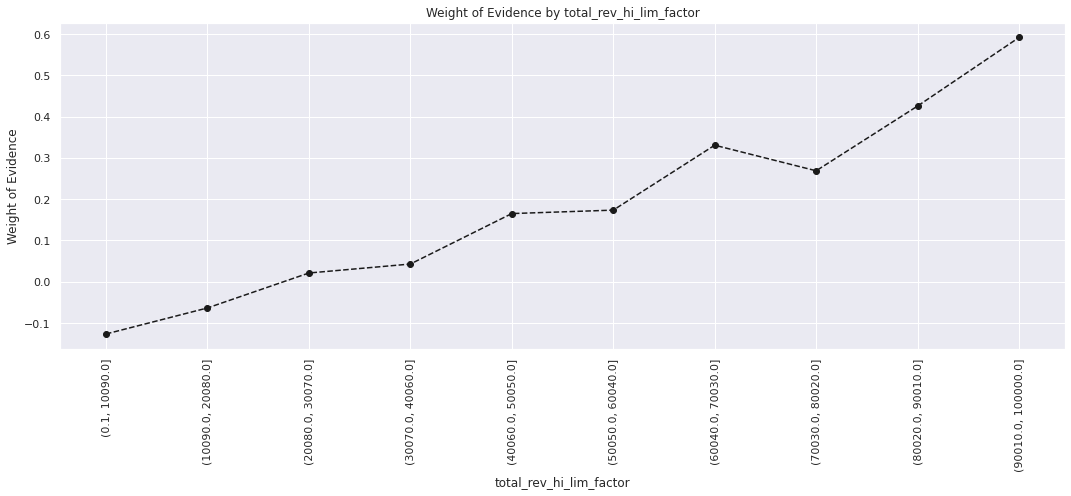

In [ ]:
plot_by_woe(df_temp, 90)

In [ ]:
#Analisis total_pymnt
X['total_pymnt_factor'] = pd.cut(X['total_pymnt'], 10)
total_pym_df = woe_continous(X, 'total_pymnt_factor', y)
total_pym_df

,total_pymnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-20.362, 5640.912]",47686,0.816802,0.262464,38950.0,8736.0,0.237700,0.490126,-0.723652,NaN,NaN,inf
1,"(5640.912, 11246.134]",63792,0.906822,0.351111,57848.0,5944.0,0.353029,0.333483,0.056958,0.090021,0.780610,inf
2,"(11246.134, 16851.356]",35463,0.940614,0.195188,33357.0,2106.0,0.203568,0.118155,0.543998,0.033792,0.487041,inf
3,"(16851.356, 22456.578]",17528,0.959493,0.096474,16818.0,710.0,0.102635,0.039834,0.946461,0.018879,0.402463,inf
4,"(22456.578, 28061.8]",8868,0.974064,0.048809,8638.0,230.0,0.052715,0.012904,1.407368,0.014571,0.460907,inf
5,"(28061.8, 33667.022]",4154,0.985556,0.022864,4094.0,60.0,0.024984,0.003366,2.004454,0.011492,0.597086,inf
6,"(33667.022, 39272.244]",2412,0.989221,0.013276,2386.0,26.0,0.014561,0.001459,2.300798,0.003664,0.296344,inf
7,"(39272.244, 44877.466]",1434,0.991632,0.007893,1422.0,12.0,0.008678,0.000673,2.556434,0.002411,0.255636,inf
8,"(44877.466, 50482.688]",297,1.000000,0.001635,297.0,0.0,0.001813,0.000000,inf,0.008368,inf,inf
9,"(50482.688, 56087.91]",52,1.000000,0.000286,52.0,0.0,0.000317,0.000000,inf,0.000000,NaN,inf


In [ ]:
# analisis dti
X['dti_factor'] = pd.cut(X['dti'], 10)
dti_df = woe_continous(X, 'dti_factor', y)
dti_df

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 3.999]",5131,0.929059,0.028241,4767.0,364.0,0.029092,0.020422,0.353840,NaN,NaN,0.039625
1,"(3.999, 7.998]",16275,0.924178,0.089578,15041.0,1234.0,0.091791,0.069232,0.282040,0.004880,0.071800,0.039625
2,"(7.998, 11.997]",27692,0.920591,0.152417,25493.0,2199.0,0.155576,0.123373,0.231922,0.003587,0.050118,0.039625
3,"(11.997, 15.996]",34055,0.912553,0.187439,31077.0,2978.0,0.189653,0.167078,0.126737,0.008038,0.105185,0.039625
4,"(15.996, 19.995]",32736,0.899927,0.180179,29460.0,3276.0,0.179785,0.183797,-0.022069,0.012627,0.148806,0.039625
5,"(19.995, 23.994]",27113,0.891602,0.149230,24174.0,2939.0,0.147527,0.164890,-0.111270,0.008325,0.089202,0.039625
6,"(23.994, 27.993]",19736,0.877736,0.108627,17323.0,2413.0,0.105717,0.135379,-0.247314,0.013866,0.136044,0.039625
7,"(27.993, 31.992]",12176,0.870647,0.067017,10601.0,1575.0,0.064695,0.088364,-0.311786,0.007089,0.064471,0.039625
8,"(31.992, 35.991]",5602,0.873260,0.030833,4892.0,710.0,0.029854,0.039834,-0.288387,0.002612,0.023398,0.039625
9,"(35.991, 39.99]",1170,0.883761,0.006440,1034.0,136.0,0.006310,0.007630,-0.189944,0.010501,0.098444,0.039625


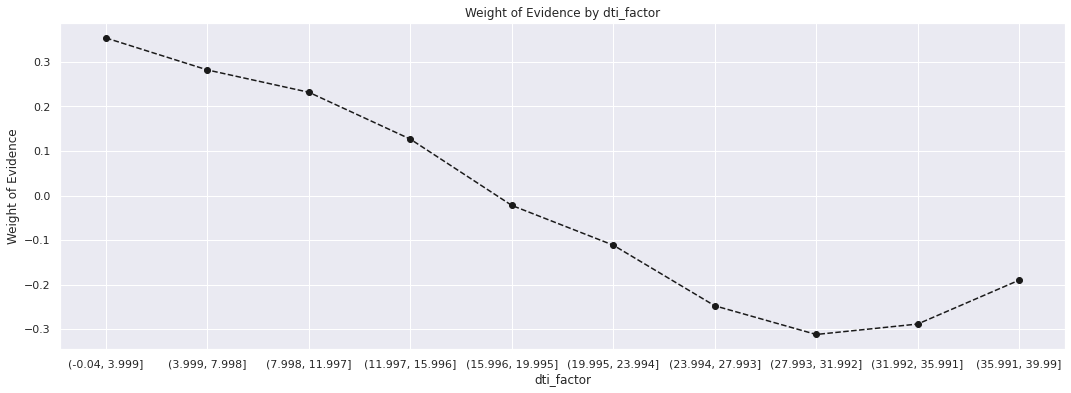

In [ ]:
plot_by_woe(dti_df)

Kategori seperti (27.993, 31.992), (31.992, 35.991), (35.991, 39,99)  akan digabungkan:



In [ ]:
#Analisis annual income
X['annual_inc_factor'] = pd.cut(X['annual_inc'], 50)
ann_inc_df = woe_continous(X, 'annual_inc_factor', y)
ann_inc_df

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-3496.0, 153920.0]",172204,0.900415,0.947811,155055.0,17149.0,0.946254,0.962130,-0.016639,NaN,NaN,inf
1,"(153920.0, 303840.0]",8507,0.927236,0.046823,7888.0,619.0,0.048138,0.034728,0.326514,0.026822,0.343153,inf
2,"(303840.0, 453760.0]",676,0.936391,0.003721,633.0,43.0,0.003863,0.002412,0.470792,0.009154,0.144278,inf
3,"(453760.0, 603680.0]",177,0.966102,0.000974,171.0,6.0,0.001044,0.000337,1.131425,0.029711,0.660634,inf
4,"(603680.0, 753600.0]",44,0.931818,0.000242,41.0,3.0,0.000250,0.000168,0.396481,0.034284,0.734944,inf
5,"(753600.0, 903520.0]",34,0.911765,0.000187,31.0,3.0,0.000189,0.000168,0.116896,0.020053,0.279585,inf
6,"(903520.0, 1053440.0]",21,0.952381,0.000116,20.0,1.0,0.000122,0.000056,0.777254,0.040616,0.660357,inf
7,"(1053440.0, 1203360.0]",9,1.000000,0.000050,9.0,0.0,0.000055,0.000000,inf,0.047619,inf,inf
8,"(1203360.0, 1353280.0]",4,1.000000,0.000022,4.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf
9,"(1353280.0, 1503200.0]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf


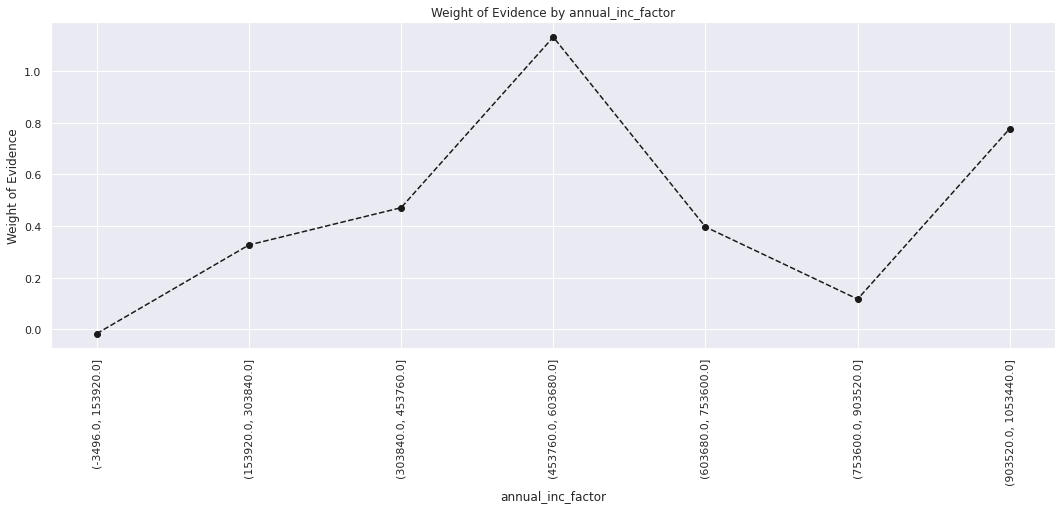

In [ ]:
plot_by_woe(ann_inc_df, 90)

KIta akan memisahkan variabel ini menjadi orang-orang dengan pendapatan/income yang lebih tinggi dan lebih rendah. Dari tabel WOE kita melihat bahwa dengan bertambahnya pendapatan tahunan maka jumlah pengamatan berkurang, hal ini karena hanya sedikit orang yang memperoleh pendapatan tinggi. Kita akan membuat variabel baru untuk orang dengan pendapatan di atas 150.000 dolar.. Dan juga, menganalisis orang dengan pendapatan di bawah 150.000 dolar.

In [ ]:
#Analisis income  dibawah 150.000
X_train_prepr_temp = X[X['annual_inc'] <= 150000].copy()
# fine-classing lagi
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'], 10)
# pastikan untuk memilih hanya indeks yang relevan di kolom target
df_temp = woe_continous(X_train_prepr_temp, 'annual_inc_factor', y[X_train_prepr_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3854.0, 18600.0]",498,0.881526,0.002896,439.0,59.0,0.002835,0.003444,-0.194476,NaN,NaN,0.032662
1,"(18600.0, 33200.0]",10295,0.874794,0.059868,9006.0,1289.0,0.058167,0.075244,-0.257414,0.006733,0.062938,0.032662
2,"(33200.0, 47800.0]",29058,0.882545,0.168980,25645.0,3413.0,0.165633,0.199229,-0.184681,0.007752,0.072733,0.032662
3,"(47800.0, 62400.0]",38948,0.890290,0.226493,34675.0,4273.0,0.223955,0.249431,-0.107735,0.007744,0.076946,0.032662
4,"(62400.0, 77000.0]",31578,0.902052,0.183635,28485.0,3093.0,0.183976,0.180550,0.018798,0.011762,0.126533,0.032662
5,"(77000.0, 91600.0]",23491,0.913243,0.136607,21453.0,2038.0,0.138558,0.118966,0.152458,0.011191,0.133659,0.032662
6,"(91600.0, 106200.0]",16338,0.916330,0.095010,14971.0,1367.0,0.096693,0.079797,0.192058,0.003087,0.039601,0.032662
7,"(106200.0, 120800.0]",10676,0.923942,0.062084,9864.0,812.0,0.063709,0.047399,0.295709,0.007612,0.103650,0.032662
8,"(120800.0, 135400.0]",6126,0.934541,0.035624,5725.0,401.0,0.036976,0.023408,0.457198,0.010600,0.161490,0.032662
9,"(135400.0, 150000.0]",4953,0.922067,0.028803,4567.0,386.0,0.029497,0.022532,0.269336,0.012474,0.187862,0.032662


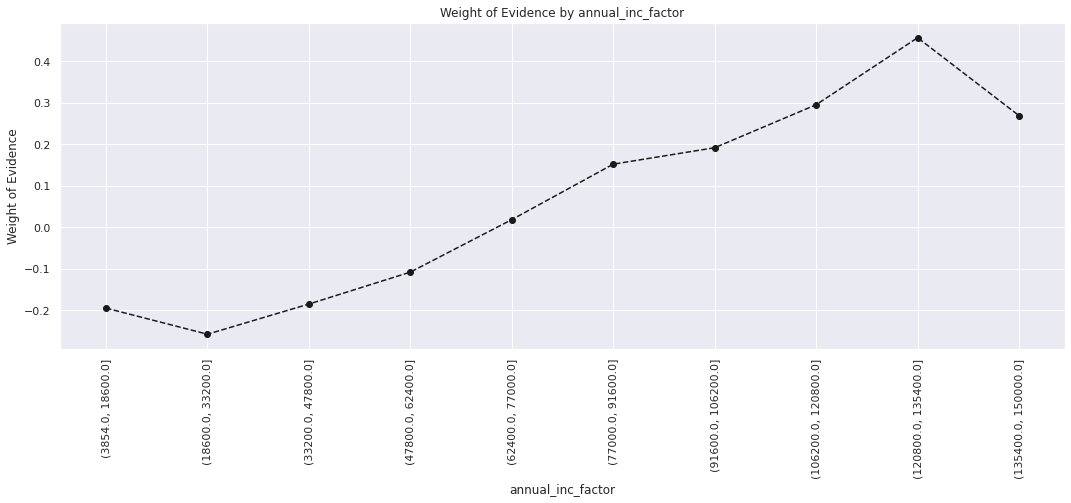

In [ ]:
plot_by_woe(df_temp, 90)

dari grafik diatas kita akan menggabungkan kategori berikut berdasarkan WOE dan jumlah observasi sebagai berikut:

(<=32000), (>32000 <= 50000), (>50000 <= 60000), (>60000 <=75000), (>75000 <=90000), (>90000 <=120000), (>120000 <=135000), (>135000 <=150000), (>150000)

In [ ]:
#analisis inq_last_6mths
X['inq_last_6mths_factor'] = pd.cut(X['inq_last_6mths'], 7)
inq_fact_df = woe_continous(X, 'inq_last_6mths_factor', y)
inq_fact_df

,inq_last_6mths_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.007, 1.0]",143652,0.909671,0.790661,130676.0,12976.0,0.797476,0.728007,0.091141,NaN,NaN,inf
1,"(1.0, 2.0]",23520,0.880145,0.129454,20701.0,2819.0,0.126332,0.158158,-0.224679,0.029526,0.315820,inf
2,"(2.0, 3.0]",9932,0.860451,0.054666,8546.0,1386.0,0.052154,0.077760,-0.399437,0.019693,0.174758,inf
3,"(3.0, 4.0]",3107,0.855809,0.017101,2659.0,448.0,0.016227,0.025135,-0.437567,0.004642,0.038129,inf
4,"(4.0, 5.0]",1078,0.882189,0.005933,951.0,127.0,0.005804,0.007125,-0.205152,0.026380,0.232415,inf
5,"(5.0, 6.0]",396,0.828283,0.002180,328.0,68.0,0.002002,0.003815,-0.644973,0.053906,0.439821,inf
6,"(6.0, 7.0]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.171717,inf,inf


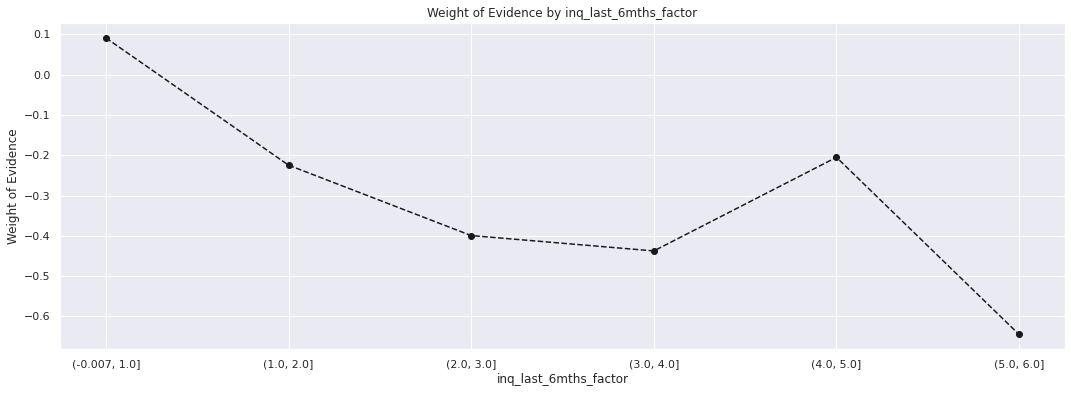

In [ ]:
plot_by_woe(inq_fact_df)

Kategori berikut akan dibuat:

The follwing categories will be created

1. < 1 months
2. 1-2
3. 2-4
4. 4-7

In [ ]:
# analisis total current balance
X['tot_cur_bal_factor'] = pd.cut(X['tot_cur_bal'], 20)
curr_bal_df = woe_continous(X, 'tot_cur_bal_factor', y)
curr_bal_df

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-8000.078, 400003.9]",169250,0.899592,0.931552,152256.0,16994.0,0.929172,0.953434,-0.025776,NaN,NaN,inf
1,"(400003.9, 800007.8]",11512,0.932853,0.063362,10739.0,773.0,0.065537,0.043368,0.412879,0.033260,0.438655,inf
2,"(800007.8, 1200011.7]",731,0.935705,0.004023,684.0,47.0,0.004174,0.002637,0.459332,0.002852,0.046452,inf
3,"(1200011.7, 1600015.6]",126,0.968254,0.000694,122.0,4.0,0.000745,0.000224,1.199248,0.032549,0.739916,inf
4,"(1600015.6, 2000019.5]",33,0.848485,0.000182,28.0,5.0,0.000171,0.000281,-0.495712,0.119769,1.694960,inf
5,"(2000019.5, 2400023.4]",16,0.937500,0.000088,15.0,1.0,0.000092,0.000056,0.489571,0.089015,0.985284,inf
6,"(2400023.4, 2800027.3]",8,1.000000,0.000044,8.0,0.0,0.000049,0.000000,inf,0.062500,inf,inf
7,"(2800027.3, 3200031.2]",2,1.000000,0.000011,2.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf
8,"(3200031.2, 3600035.1]",1,1.000000,0.000006,1.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf
9,"(3600035.1, 4000039.0]",4,1.000000,0.000022,4.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf


In [ ]:
#Analisis current balance  dibawah 400.000
X_train_prepr_temp = X[X['tot_cur_bal'] <= 400000].copy()
# fine-classing lagi
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 10)
# pastikan untuk memilih hanya indeks yang relevan di kolom target
df_temp = woe_continous(X_train_prepr_temp, 'tot_cur_bal_factor', y[X_train_prepr_temp.index])
df_temp

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-399.999, 39999.9]",55529,0.893929,0.328091,49639.0,5890.0,0.326025,0.346593,-0.061176,NaN,NaN,0.01394
1,"(39999.9, 79999.8]",28089,0.887073,0.165963,24917.0,3172.0,0.163653,0.186654,-0.131508,0.006856,0.070333,0.01394
2,"(79999.8, 119999.7]",14663,0.896815,0.086636,13150.0,1513.0,0.086368,0.089031,-0.030369,0.009742,0.101139,0.01394
3,"(119999.7, 159999.6]",14742,0.899674,0.087102,13263.0,1479.0,0.087110,0.087031,0.000916,0.002859,0.031285,0.01394
4,"(159999.6, 199999.5]",14896,0.903531,0.088012,13459.0,1437.0,0.088398,0.084559,0.044394,0.003857,0.043478,0.01394
5,"(199999.5, 239999.4]",12642,0.907610,0.074695,11474.0,1168.0,0.075360,0.068730,0.092094,0.004078,0.047700,0.01394
6,"(239999.4, 279999.3]",10255,0.916919,0.060591,9403.0,852.0,0.061758,0.050135,0.208501,0.009309,0.116407,0.01394
7,"(279999.3, 319999.2]",8030,0.913948,0.047445,7339.0,691.0,0.048202,0.040661,0.170122,0.002971,0.038379,0.01394
8,"(319999.2, 359999.1]",5931,0.926151,0.035043,5493.0,438.0,0.036078,0.025774,0.336315,0.012203,0.166193,0.01394
9,"(359999.1, 399999.0]",4472,0.920841,0.026423,4118.0,354.0,0.027047,0.020831,0.261130,0.005310,0.075185,0.01394


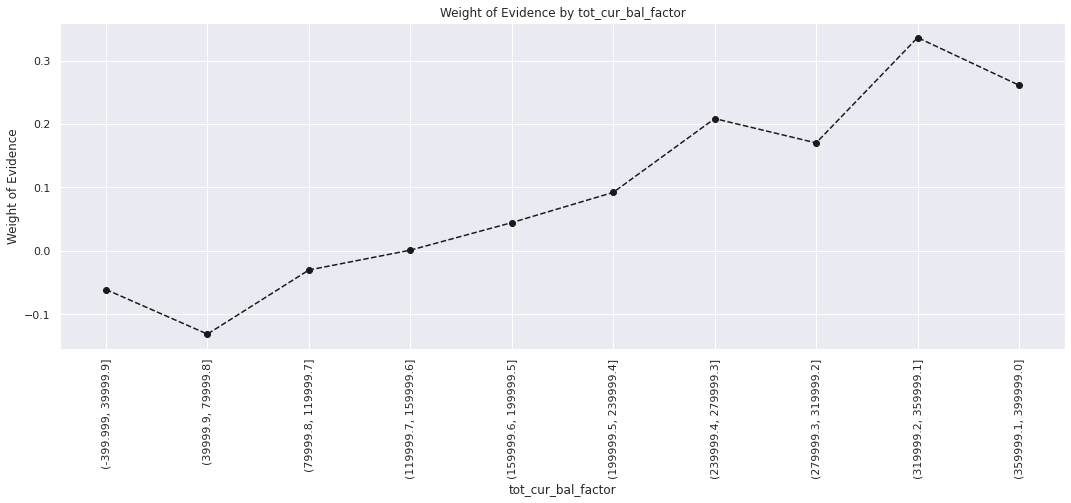

In [ ]:
plot_by_woe(df_temp, 90)

variabel yang akan dibuat:

< 40000 40000-80000 80000-120000 120000-160000 160000-200000 200000-240000 240000-320000 320000-400000

In [ ]:
# analisis mths_since_credit_pull 
X['mths_since_last_credit_pull_d_factor'] = pd.cut(X['mths_since_last_credit_pull_d'], 10)
mths_cr_pull_df = woe_continous(X, 'mths_since_last_credit_pull_d_factor', y)
mths_cr_pull_df

,mths_since_last_credit_pull_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(54.96, 59.0]",156536,0.924810,0.861574,144766.0,11770.0,0.883463,0.660346,0.291086,NaN,NaN,0.313463
1,"(59.0, 63.0]",8447,0.798153,0.046492,6742.0,1705.0,0.041144,0.095658,-0.843687,0.126656,1.134773,0.313463
2,"(63.0, 67.0]",6806,0.748163,0.037460,5092.0,1714.0,0.031075,0.096162,-1.129638,0.049990,0.285951,0.313463
3,"(67.0, 71.0]",3942,0.714612,0.021697,2817.0,1125.0,0.017191,0.063117,-1.300589,0.033552,0.170951,0.313463
4,"(71.0, 75.0]",2666,0.755064,0.014674,2013.0,653.0,0.012285,0.036636,-1.092674,0.040452,0.207915,0.313463
5,"(75.0, 79.0]",1737,0.707542,0.009560,1229.0,508.0,0.007500,0.028501,-1.335004,0.047522,0.242330,0.313463
6,"(79.0, 83.0]",868,0.720046,0.004777,625.0,243.0,0.003814,0.013633,-1.273789,0.012504,0.061216,0.313463
7,"(83.0, 87.0]",461,0.811280,0.002537,374.0,87.0,0.002282,0.004881,-0.760131,0.091234,0.513657,0.313463
8,"(87.0, 91.0]",193,0.906736,0.001062,175.0,18.0,0.001068,0.001010,0.055935,0.095456,0.816067,0.313463
9,"(91.0, 95.0]",30,0.966667,0.000165,29.0,1.0,0.000177,0.000056,1.148817,0.059931,1.092882,0.313463


In [ ]:
#Analisis mths_since_credit_pull  below 60
X_train_prepr_temp = X[X['mths_since_last_credit_pull_d'] <= 60].copy()
# fine-classing lagi
X_train_prepr_temp['mths_since_last_credit_pull_d'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 5)
# pastikan untuk memilih hanya indeks yang relevan di kolom target
df_temp = woe_continous(X_train_prepr_temp, 'mths_since_last_credit_pull_d', y[X_train_prepr_temp.index])
df_temp

,mths_since_last_credit_pull_d,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(54.995, 56.0]",147534,0.923638,0.929102,136268.0,11266.0,0.929592,0.923216,0.006883,NaN,NaN,0.111477
1,"(56.0, 57.0]",3189,0.991847,0.020083,3163.0,26.0,0.021577,0.002131,2.315229,0.068209,2.308345,0.111477
2,"(57.0, 58.0]",2910,0.985567,0.018326,2868.0,42.0,0.019565,0.003442,1.737750,0.006280,0.577479,0.111477
3,"(58.0, 59.0]",2903,0.849811,0.018282,2467.0,436.0,0.016829,0.035729,-0.752835,0.135756,2.490585,0.111477
4,"(59.0, 60.0]",2256,0.808067,0.014207,1823.0,433.0,0.012436,0.035483,-1.048450,0.041743,0.295615,0.111477


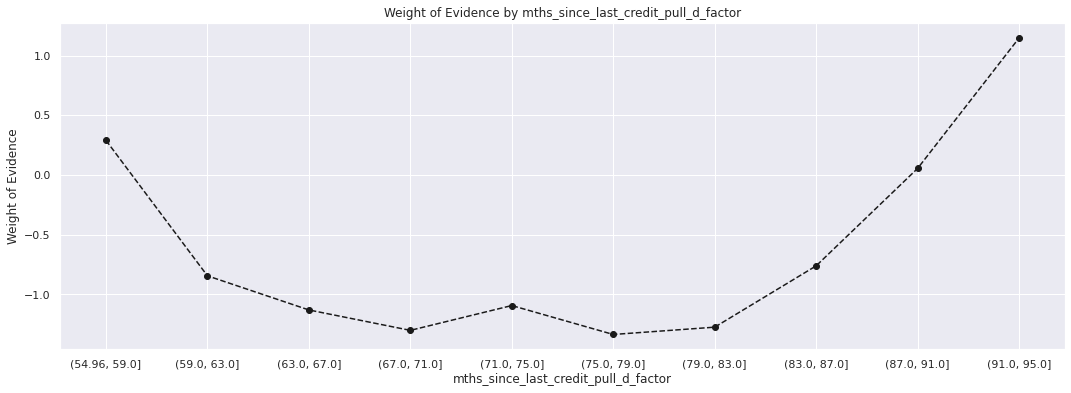

In [ ]:
plot_by_woe(mths_cr_pull_df)

Kategori berikut akan dikelompokkan bersama: 54-65, 65-76, lebih besar dari 76

In [ ]:
# analisis out_prncp 
X['out_prncp_factor'] = pd.cut(X['out_prncp'], 10)
out_df = woe_continous(X, 'out_prncp_factor', y)
out_df

,out_prncp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-31.899, 3189.877]",96256,0.848072,0.529793,81632.0,14624.0,0.498175,0.820467,-0.498921,NaN,NaN,0.503777
1,"(3189.877, 6379.754]",25082,0.967945,0.138051,24278.0,804.0,0.148161,0.045108,1.189248,0.119873,1.688169,0.503777
2,"(6379.754, 9569.631]",18963,0.966197,0.104372,18322.0,641.0,0.111814,0.035963,1.134350,0.001748,0.054898,0.503777
3,"(9569.631, 12759.508]",15134,0.962997,0.083298,14574.0,560.0,0.088941,0.031418,1.040579,0.003200,0.093771,0.503777
4,"(12759.508, 15949.385]",9680,0.960434,0.053279,9297.0,383.0,0.056737,0.021488,0.970933,0.002563,0.069646,0.503777
5,"(15949.385, 19139.262]",6762,0.954451,0.037218,6454.0,308.0,0.039387,0.017280,0.823877,0.005983,0.147056,0.503777
6,"(19139.262, 22329.139]",4619,0.952804,0.025423,4401.0,218.0,0.026858,0.012231,0.786613,0.001648,0.037264,0.503777
7,"(22329.139, 25519.016]",2860,0.952448,0.015741,2724.0,136.0,0.016624,0.007630,0.778723,0.000356,0.007890,0.503777
8,"(25519.016, 28708.893]",1642,0.950061,0.009038,1560.0,82.0,0.009520,0.004601,0.727243,0.002387,0.051480,0.503777
9,"(28708.893, 31898.77]",688,0.901163,0.003787,620.0,68.0,0.003784,0.003815,-0.008267,0.048898,0.735510,0.503777


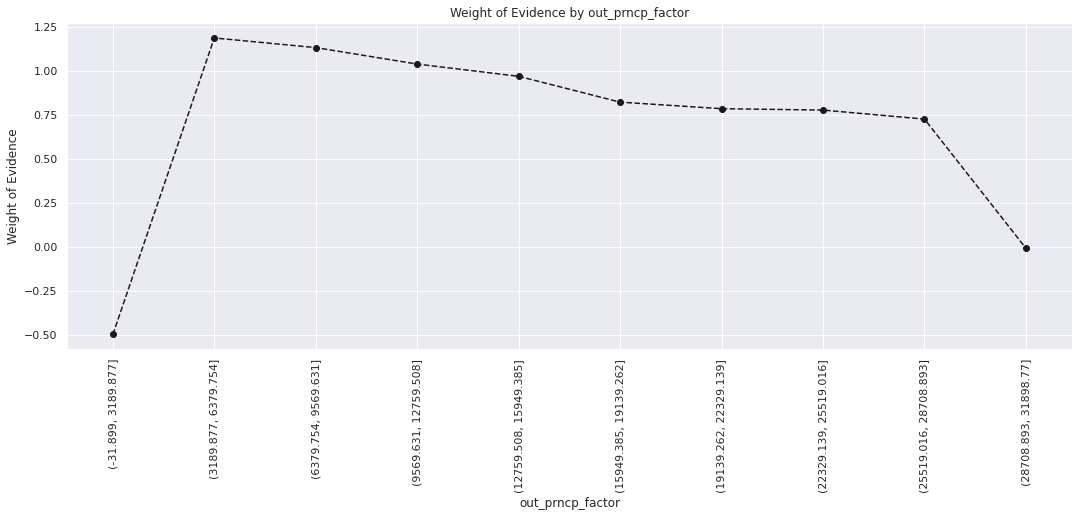

In [ ]:
plot_by_woe(out_df, 90)

In [ ]:
# analisis mths_since_issue_date 
X['mths_since_issue_d'] = pd.cut(X['mths_since_issue_d'], 10)
iss_df = woe_continous(X, 'mths_since_issue_d', y)
iss_df

,mths_since_issue_d,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(67.972, 70.8]",36486,0.938141,0.200819,34229.0,2257.0,0.208889,0.126627,0.500558,NaN,NaN,0.087677
1,"(70.8, 73.6]",28044,0.917273,0.154354,25724.0,2320.0,0.156986,0.130162,0.187378,0.020868,0.313180,0.087677
2,"(73.6, 76.4]",26305,0.908002,0.144783,23885.0,2420.0,0.145763,0.135772,0.071004,0.009271,0.116374,0.087677
3,"(76.4, 79.2]",22738,0.900035,0.125150,20465.0,2273.0,0.124892,0.127525,-0.020863,0.007967,0.091868,0.087677
4,"(79.2, 82.0]",19484,0.892425,0.107240,17388.0,2096.0,0.106114,0.117594,-0.102729,0.007611,0.081866,0.087677
5,"(82.0, 84.8]",10753,0.885427,0.059185,9521.0,1232.0,0.058104,0.069120,-0.173618,0.006997,0.070889,0.087677
6,"(84.8, 87.6]",13611,0.867901,0.074915,11813.0,1798.0,0.072091,0.100875,-0.335953,0.017526,0.162335,0.087677
7,"(87.6, 90.4]",9304,0.868121,0.051209,8077.0,1227.0,0.049291,0.068840,-0.334030,0.000220,0.001923,0.087677
8,"(90.4, 93.2]",10186,0.858237,0.056064,8742.0,1444.0,0.053350,0.081014,-0.417757,0.009884,0.083726,0.087677
9,"(93.2, 96.0]",4775,0.841466,0.026282,4018.0,757.0,0.024521,0.042471,-0.549302,0.016771,0.131546,0.087677


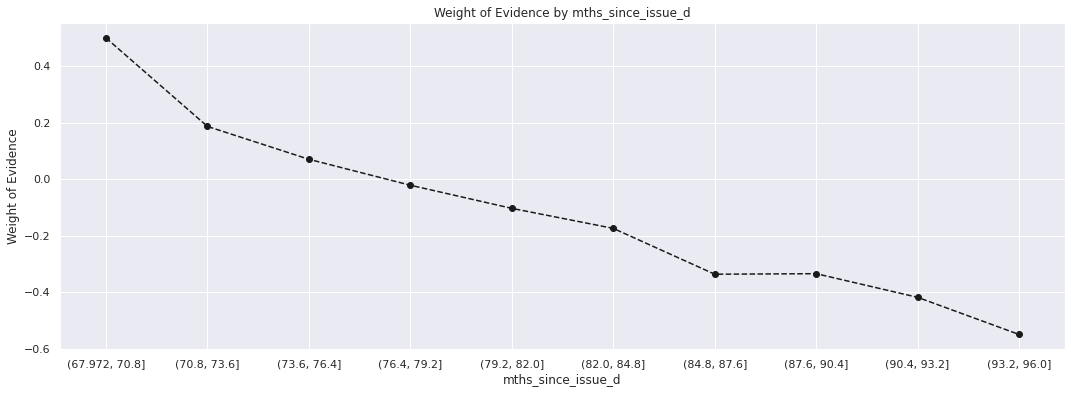

In [ ]:
plot_by_woe(iss_df)

### Membuat fitur/kolom baru berdasarkan WOE

In [ ]:
#kita akan buat dataframe baru dan dimulai dari variable grade 

new_df = preprocess_data.loc[:, 'grade:A':'grade:G']

In [ ]:
#menampilkan 5 data teratas untuk memastikan kode diatas bekerja
new_df.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
42537,1,0,0,0,0,0,0
42538,0,1,0,0,0,0,0
42539,1,0,0,0,0,0,0
42541,0,1,0,0,0,0,0
42543,0,1,0,0,0,0,0


In [ ]:
# # home_ownership 

new_df['home_ownership:OWN'] = preprocess_data.loc[:, 'home_ownership:OWN']
new_df['home_ownership:OTHER_NONE_RENT_ANY'] = sum([preprocess_data['home_ownership:OTHER'], preprocess_data['home_ownership:NONE'],
                                                 preprocess_data['home_ownership:RENT'], preprocess_data['home_ownership:ANY']])
new_df['home_ownership:MORTGAGE'] = preprocess_data.loc[:, 'home_ownership:MORTGAGE']

#verification status
new_df['verification_status:NOT_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Not Verified']
new_df['verification_status:SOURCE_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Source Verified']
new_df['verification_status:VERIFIED'] = preprocess_data.loc[:, 'verification_status:Verified']

# purpose of loan
new_df['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = sum([preprocess_data['purpose:small_business'],  preprocess_data['purpose:renewable_energy'], preprocess_data['purpose:moving']])

new_df['purpose:OTHER_HOUSE_MEDICAL'] =sum([preprocess_data['purpose:other'], preprocess_data['purpose:house'], preprocess_data['purpose:medical']])
new_df ['purpose:WEDDING_VACATION'] = sum([preprocess_data['purpose:wedding'], preprocess_data['purpose:vacation']])
new_df ['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = sum([preprocess_data['purpose:home_improvement'], preprocess_data['purpose:major_purchase']])
new_df ['purpose:CAR_CREDIT_CARD'] = sum([preprocess_data['purpose:car'], preprocess_data['purpose:credit_card']])


# addr state
new_df['addr_state:NE_IA_NV_HI_FL_AL'] =sum([preprocess_data['addr_state:IA'],preprocess_data['addr_state:NV'],
                                           preprocess_data['addr_state:HI'],preprocess_data['addr_state:FL'],preprocess_data['addr_state:AL']])
new_df['addr_state:NY'] = preprocess_data.loc[:, 'addr_state:NY']
new_df['addr_state:LA_NM_OK_NC_MO_MD_NJ_VA'] = sum([preprocess_data['addr_state:LA'],preprocess_data['addr_state:NM'],preprocess_data['addr_state:OK'],
                     preprocess_data['addr_state:NC'],preprocess_data['addr_state:MO'],preprocess_data['addr_state:MD'], preprocess_data['addr_state:NJ'],
                                                  preprocess_data['addr_state:VA']])
new_df['addr_state:CA'] = preprocess_data.loc[:,'addr_state:CA']
new_df['addr_state:AZ_MI_UT_TN_AR_PA'] =sum([preprocess_data['addr_state:AZ'],preprocess_data['addr_state:MI'],preprocess_data['addr_state:UT'],
preprocess_data['addr_state:TN'],preprocess_data['addr_state:AR'],preprocess_data['addr_state:PA']])

new_df['addr_state:RI_OH_KY_DE_MN_SD_MA_IN'] =sum([preprocess_data['addr_state:RI'],preprocess_data['addr_state:OH'],preprocess_data['addr_state:KY'],
 preprocess_data['addr_state:DE'],preprocess_data['addr_state:MN'],preprocess_data['addr_state:SD'],preprocess_data['addr_state:MA'],
                    preprocess_data['addr_state:IN']])

new_df['addr_state:GA_WA'] = sum([preprocess_data['addr_state:GA'], preprocess_data['addr_state:WA']])
new_df['addr_state:WI_OR'] = sum([preprocess_data['addr_state:WI'], preprocess_data['addr_state:OR']])
new_df['addr_state:TX'] = preprocess_data.loc[:,'addr_state:TX']
new_df['addr_state:IL_CT_MT'] =sum([preprocess_data['addr_state:IL'],preprocess_data['addr_state:CT'],preprocess_data['addr_state:MT']])
new_df['addr_state:CO_SC'] = sum([preprocess_data['addr_state:CO'], preprocess_data['addr_state:SC']])
new_df['addr_state:KS_VT_AK_NS'] =sum([preprocess_data['addr_state:KS'],preprocess_data['addr_state:VT'],preprocess_data['addr_state:AK'],
                                           preprocess_data['addr_state:MS']])
new_df['addr_state:NH_WV_WY_DC'] =sum([preprocess_data['addr_state:NH'],preprocess_data['addr_state:WV'],preprocess_data['addr_state:WY'],
                                           preprocess_data['addr_state:DC']])
#initial_list_status
new_df['initial_list_status:F'] = preprocess_data.loc[:, 'initial_list_status:f']
new_df['initial_list_status:W'] = preprocess_data.loc[:, 'initial_list_status:w']

# term 
new_df['term:36'] = np.where((preprocess_data['term'] == 36), 1, 0)
new_df['term:60'] = np.where((preprocess_data['term']==60), 1,0)

#total_rec_int 
new_df['total_rec_int:<1000'] = np.where((preprocess_data['total_rec_int']<=1000), 1,0)
new_df['total_rec_int:1000-2000'] = np.where((preprocess_data['total_rec_int']>1000) &(preprocess_data['total_rec_int']<=2000), 1,0)
new_df['total_rec_int:2000-9000'] = np.where((preprocess_data['total_rec_int']>2000) &(preprocess_data['total_rec_int']<=9000), 1,0)
new_df['total_rec_int:>9000'] = np.where((preprocess_data['total_rec_int']>9000), 1,0)


#total_revol_hi_lim
new_df['total_rev_hi_lim:<10000'] =np.where((preprocess_data['total_rev_hi_lim']<=10000),1,0)
new_df['total_rev_hi_lim:10000-20000'] =np.where((preprocess_data['total_rev_hi_lim']>10000)&(preprocess_data['total_rev_hi_lim']<=20000),1,0)
new_df['total_rev_hi_lim:20000-40000'] =np.where((preprocess_data['total_rev_hi_lim']>20000)&(preprocess_data['total_rev_hi_lim']<=40000),1,0)
new_df['total_rev_hi_lim:40000-60000'] =np.where((preprocess_data['total_rev_hi_lim']>40000)&(preprocess_data['total_rev_hi_lim']<=60000),1,0)
new_df['total_rev_hi_lim:60000-80000'] =np.where((preprocess_data['total_rev_hi_lim']>60000)&(preprocess_data['total_rev_hi_lim']<=80000),1,0)
new_df['total_rev_hi_lim:80000-100000'] =np.where((preprocess_data['total_rev_hi_lim']>80000)&(preprocess_data['total_rev_hi_lim']<=100000),1,0)
new_df['total_rev_hi_lim:<100000'] =np.where((preprocess_data['total_rev_hi_lim']>100000),1,0)


#total_pymnt
new_df['total_pymnt:<5000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
new_df['total_pymnt:5000-11000'] = np.where((preprocess_data['total_pymnt']>5000)&(preprocess_data['total_pymnt']<=11000),1,0)
new_df['total_pymnt:11000-16000'] = np.where((preprocess_data['total_pymnt']>11000)&(preprocess_data['total_pymnt']<=16000),1,0)
new_df['total_pymnt:16000-22000'] = np.where((preprocess_data['total_pymnt']>16000)&(preprocess_data['total_pymnt']<=22000),1,0)
new_df['total_pymnt:>22000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
#int_Rate

new_df['int_rate:<7.484'] = np.where((preprocess_data['int_rate'] <= 7.484), 1, 0)
new_df['int_rate:7.484-9.548'] = np.where((preprocess_data['int_rate'] > 7.484) & (preprocess_data['int_rate'] <= 9.548), 1, 0)
new_df['int_rate:9.548-11.612'] = np.where((preprocess_data['int_rate'] > 9.548) & (preprocess_data['int_rate'] <= 11.612), 1, 0)
new_df['int_rate:11.612-13.676'] = np.where((preprocess_data['int_rate'] > 11.612) & (preprocess_data['int_rate'] <= 13.676), 1, 0)
new_df['int_rate:13.676-15.74'] = np.where((preprocess_data['int_rate'] > 13.676) & (preprocess_data['int_rate'] <= 15.74), 1, 0)
new_df['int_rate:15.74-17.804'] = np.where((preprocess_data['int_rate'] > 15.74) & (preprocess_data['int_rate'] <= 17.804), 1, 0)
new_df['int_rate:17.804-19.868'] = np.where((preprocess_data['int_rate'] > 17.804) & (preprocess_data['int_rate'] <= 19.868), 1, 0)
new_df['int_rate:7.19.868-21.932'] = np.where((preprocess_data['int_rate'] > 19.868) & (preprocess_data['int_rate'] <= 21.932), 1, 0)
new_df['int_rate:21.932-26.06'] = np.where((preprocess_data['int_rate'] > 21.932) & (preprocess_data['int_rate'] <= 26.06), 1, 0)


#dti 
new_df['dti:<4'] = np.where((preprocess_data['dti'] <=4), 1, 0)
new_df['dti:4-8'] = np.where((preprocess_data['dti'] > 4) & (preprocess_data['dti'] <= 8), 1, 0)
new_df['dti:8-12'] = np.where((preprocess_data['dti'] > 8) & (preprocess_data['dti'] <= 12), 1, 0)
new_df['dti:12-16'] = np.where((preprocess_data['dti'] > 12) & (preprocess_data['dti'] <= 16), 1, 0)
new_df['dti:16-20'] = np.where((preprocess_data['dti'] > 16) & (preprocess_data['dti'] <= 20), 1, 0)
new_df['dti:20-23'] = np.where((preprocess_data['dti'] > 20) & (preprocess_data['dti'] <= 23), 1, 0)
new_df['dti:23-27'] = np.where((preprocess_data['dti'] > 23) & (preprocess_data['dti'] <= 27), 1, 0)
new_df['dti:27-40'] = np.where((preprocess_data['dti'] > 27) & (preprocess_data['dti'] <= 40), 1, 0)

#annual income 
new_df['annual_inc:<32000'] = np.where((preprocess_data['annual_inc'] <= 32000), 1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000),1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000), 1, 0)
new_df['annual_inc:50000-60000'] = np.where((preprocess_data['annual_inc'] > 50000) & (preprocess_data['annual_inc'] <= 60000), 1, 0)
new_df['annual_inc:60000-75000'] = np.where((preprocess_data['annual_inc'] > 60000) & (preprocess_data['annual_inc'] <= 75000), 1, 0)
new_df['annual_inc:75000-90000'] = np.where((preprocess_data['annual_inc'] > 75000) & (preprocess_data['annual_inc'] <= 90000), 1, 0)
new_df['annual_inc:90000-120000'] = np.where((preprocess_data['annual_inc'] > 90000) & (preprocess_data['annual_inc'] <= 120000), 1, 0)
new_df['annual_inc:120000-135000'] = np.where((preprocess_data['annual_inc'] > 120000) & (preprocess_data['annual_inc'] <= 135000), 1, 0)
new_df['annual_inc:135000-150000'] = np.where((preprocess_data['annual_inc'] > 135000) & (preprocess_data['annual_inc'] <= 150000), 1, 0)
new_df['annual_inc:>150000'] = np.where((preprocess_data['annual_inc'] > 150000), 1, 0)

#inq_last_6mths
new_df['inq_last_6mths:<1'] = np.where((preprocess_data['inq_last_6mths'] <=1), 1, 0)
new_df['inq_last_6mths:1-2'] = np.where((preprocess_data['inq_last_6mths'] >1)& (preprocess_data['inq_last_6mths']<=2),  1, 0)
new_df['inq_last_6mths:2-4'] = np.where((preprocess_data['inq_last_6mths'] >2)& (preprocess_data['inq_last_6mths']<=4),  1, 0)
new_df['inq_last_6mths:4-7'] = np.where((preprocess_data['inq_last_6mths'] >4)& (preprocess_data['inq_last_6mths']<=7),  1, 0)

# #revol_util
# new_df['revol_util:<44'] = np.where((preprocess_data['revol_util'] <=44), 1,0)
# new_df['revol_util:44-89'] =np.where((preprocess_data['revol_util'] > 44) & (preprocess_data['revol_util'] <= 89),1, 0)
# new_df['revol_util:>89'] = np.where((preprocess_data['revol_util'] >89), 1,0)

#tot_cur_balance
new_df['tot_cur_bal:<40000'] = np.where((preprocess_data['tot_cur_bal'] <= 40000), 1, 0)
new_df['tot_cur_bal:40000-80000'] = np.where((preprocess_data['tot_cur_bal'] > 40000) & (preprocess_data['tot_cur_bal'] <= 80000), 1, 0)
new_df['tot_cur_bal:80000-120000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:120000-160000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:160000-200000'] = np.where((preprocess_data['tot_cur_bal'] > 160000) & (preprocess_data['tot_cur_bal'] <= 200000), 1, 0)
new_df['tot_cur_bal:200000-240000'] = np.where((preprocess_data['tot_cur_bal'] > 200000) & (preprocess_data['tot_cur_bal'] <= 240000), 1, 0)
new_df['tot_cur_bal:240000-320000'] = np.where((preprocess_data['tot_cur_bal'] > 240000) & (preprocess_data['tot_cur_bal'] <= 320000), 1, 0)
new_df['tot_cur_bal:320000-400000'] = np.where((preprocess_data['tot_cur_bal'] > 320000) & (preprocess_data['tot_cur_bal'] <= 400000), 1, 0)
new_df['tot_cur_bal:>400000'] = np.where((preprocess_data['tot_cur_bal'] > 400000), 1, 0)

#mths_since_last_credit_pull_d
new_df['mths_since_last_credit_pull_d:<65'] = np.where((preprocess_data['mths_since_last_credit_pull_d']<=65), 1,0)
new_df['mths_since_last_credit_pull_d:65-76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>65)&(preprocess_data['mths_since_last_credit_pull_d']<=76),1,0)
new_df['mths_since_last_credit_pull_d:>76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>76), 1,0)

#mths_since_issue_d_factor
new_df['mths_since_issue_d_:<70.8'] = np.where((preprocess_data['mths_since_issue_d']<=70.8), 1,0)
new_df['mths_since_issue_d_:>70.8-73.6'] = np.where((preprocess_data['mths_since_issue_d'] >70.8) & (preprocess_data['mths_since_issue_d']<=73.6), 1,0)
new_df['mths_since_issue_d_:73.6-76.4'] = np.where((preprocess_data['mths_since_issue_d']>70.8) & (preprocess_data['mths_since_issue_d']<=76.4), 1,0)
new_df['mths_since_issue_d_:>76.4-79.2'] = np.where((preprocess_data['mths_since_issue_d'] >76.4) & (preprocess_data['mths_since_issue_d']<=79.2), 1,0)
new_df['mths_since_issue_d_:>79.2-82'] = np.where((preprocess_data['mths_since_issue_d'] >79.2) & (preprocess_data['mths_since_issue_d']<=82), 1,0)
new_df['mths_since_issue_d_>82-84'] = np.where((preprocess_data['mths_since_issue_d'] >82) & (preprocess_data['mths_since_issue_d']<=84), 1,0)
new_df['mths_since_issue_d_:>84-90.4'] = np.where((preprocess_data['mths_since_issue_d'] >84) & (preprocess_data['mths_since_issue_d']<=90.4), 1,0)
new_df['mths_since_issue_d_:>90.4-96'] = np.where((preprocess_data['mths_since_issue_d'] >90.4) & (preprocess_data['mths_since_issue_d']<=96), 1,0)

new_df['out_prncp:<3000'] = np.where((preprocess_data['out_prncp']<=3000), 1,0)
new_df['out_prncp:3000-6000'] = np.where((preprocess_data['out_prncp']>3000)&(preprocess_data['out_prncp']<=6000), 1,0)
new_df['out_prncp:6000-10000'] = np.where((preprocess_data['out_prncp']>6000)&(preprocess_data['out_prncp']<=10000), 1,0)
new_df['out_prncp:10000-12000'] = np.where((preprocess_data['out_prncp']>10000)&(preprocess_data['out_prncp']<=12000), 1,0)
new_df['out_prncp:>12000'] = np.where((preprocess_data['out_prncp']>12000), 1,0)



new_df['good_bad'] = preprocess_data.loc[:, 'good_bad']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:157: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [ ]:
#Menampilkan 10 baris pertama kolom new_df
pd.options.display.max_columns = None
new_df.head(10)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OWN,home_ownership:OTHER_NONE_RENT_ANY,home_ownership:MORTGAGE,verification_status:NOT_VERIFIED,verification_status:SOURCE_VERIFIED,verification_status:VERIFIED,purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING,purpose:OTHER_HOUSE_MEDICAL,purpose:WEDDING_VACATION,purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE,purpose:CAR_CREDIT_CARD,addr_state:NE_IA_NV_HI_FL_AL,addr_state:NY,addr_state:LA_NM_OK_NC_MO_MD_NJ_VA,addr_state:CA,addr_state:AZ_MI_UT_TN_AR_PA,addr_state:RI_OH_KY_DE_MN_SD_MA_IN,addr_state:GA_WA,addr_state:WI_OR,addr_state:TX,addr_state:IL_CT_MT,addr_state:CO_SC,addr_state:KS_VT_AK_NS,addr_state:NH_WV_WY_DC,initial_list_status:F,initial_list_status:W,term:36,term:60,total_rec_int:<1000,total_rec_int:1000-2000,total_rec_int:2000-9000,total_rec_int:>9000,total_rev_hi_lim:<10000,total_rev_hi_lim:10000-20000,total_rev_hi_lim:20000-40000,total_rev_hi_lim:40000-60000,total_rev_hi_lim:60000-80000,total_rev_hi_lim:80000-100000,total_rev_hi_lim:<100000,total_pymnt:<5000,total_pymnt:5000-11000,total_pymnt:11000-16000,total_pymnt:16000-22000,total_pymnt:>22000,int_rate:<7.484,int_rate:7.484-9.548,int_rate:9.548-11.612,int_rate:11.612-13.676,int_rate:13.676-15.74,int_rate:15.74-17.804,int_rate:17.804-19.868,int_rate:7.19.868-21.932,int_rate:21.932-26.06,dti:<4,dti:4-8,dti:8-12,dti:12-16,dti:16-20,dti:20-23,dti:23-27,dti:27-40,annual_inc:<32000,annual_inc:32000-50000,annual_inc:50000-60000,annual_inc:60000-75000,annual_inc:75000-90000,annual_inc:90000-120000,annual_inc:120000-135000,annual_inc:135000-150000,annual_inc:>150000,inq_last_6mths:<1,inq_last_6mths:1-2,inq_last_6mths:2-4,inq_last_6mths:4-7,tot_cur_bal:<40000,tot_cur_bal:40000-80000,tot_cur_bal:80000-120000,tot_cur_bal:120000-160000,tot_cur_bal:160000-200000,tot_cur_bal:200000-240000,tot_cur_bal:240000-320000,tot_cur_bal:320000-400000,tot_cur_bal:>400000,mths_since_last_credit_pull_d:<65,mths_since_last_credit_pull_d:65-76,mths_since_last_credit_pull_d:>76,mths_since_issue_d_:<70.8,mths_since_issue_d_:>70.8-73.6,mths_since_issue_d_:73.6-76.4,mths_since_issue_d_:>76.4-79.2,mths_since_issue_d_:>79.2-82,mths_since_issue_d_>82-84,mths_since_issue_d_:>84-90.4,mths_since_issue_d_:>90.4-96,out_prncp:<3000,out_prncp:3000-6000,out_prncp:6000-10000,out_prncp:10000-12000,out_prncp:>12000,good_bad
42537,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42538,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
42539,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42541,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42543,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42544,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
42547,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
42548,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0

In [ ]:
new_df.shape

(181686, 107)

In [ ]:
new_df1 = new_df

Sekarang kita harus menghapus 1 variabel dummy untuk setiap variabel asli, jika tidak kita akan masuk ke dalam perangkap variabel dummy. variabel dummy yang akan dihilangkan adalah yang memiliki WOE paling rendah.

In [ ]:
#menghapus dummy kategori
ref_categories = ['home_ownership:OTHER_NONE_RENT_ANY', 'total_rec_int:<1000', 'total_pymnt:<5000','total_rev_hi_lim:<10000', 'grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING',
                 'addr_state:NE_IA_NV_HI_FL_AL', 'initial_list_status:F', 'term:60', 'mths_since_issue_d_:>90.4-96','int_rate:21.932-26.06', 'dti:27-40',
                  'annual_inc:<32000', 'inq_last_6mths:4-7', 'tot_cur_bal:<40000', 'mths_since_last_credit_pull_d:>76', 'out_prncp:>12000']
 
new_df.drop(columns=ref_categories, inplace=True, axis=1)

In [ ]:
#cek shape setelah penghapusan kolom2 dummy
new_df.shape

(181686, 89)

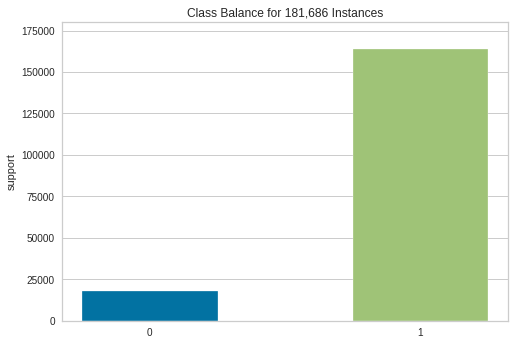

In [ ]:
# mengecek apakah label kelas udah balance atau belum

from yellowbrick.target import ClassBalance
X= new_df.drop(columns='good_bad', axis=1)
y = new_df['good_bad']
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

dari grafik di atas kita lihat bahwa orang yang diklasifikasikan sebagai peminjam yang buruk memiliki pengamatan/observasi sangat sedikit, ketidakseimbangan kelas ini dapat mempengaruhi model kita saat pelatihan. Untuk mengatasi masalah ini kita akan mengambil sampel (oversample) kelas minoritas

In [ ]:
#spliting data menjadi data latih (train) dan data tes (test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#mengecek imbalance data untuk dataset training
y_train.value_counts()

1    131168
0     14180
Name: good_bad, dtype: int64

## Model Development dan Model Evaluation

In [ ]:
#mengimport librari untuk model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [ ]:
#menangani imbalance data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)

In [ ]:
# mengecek value counts setelah oversampling
y_train_series.value_counts()

1    131168
0    131168
Name: good_bad, dtype: int64

In [ ]:
#Membangun model
model = LogisticRegression()
model.fit(X_train_o, y_train_o)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#memprediksi
y_preds = model.predict(X_test)

In [ ]:
#cmengklasifikasikan report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.29      0.80      0.43      3644
           1       0.97      0.79      0.87     32694

    accuracy                           0.79     36338
   macro avg       0.63      0.79      0.65     36338
weighted avg       0.90      0.79      0.83     36338



In [ ]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
245418,1,0.409546,0
246432,1,0.637851,1
429499,1,0.746598,1
449592,1,0.445835,0
196542,1,0.404013,0


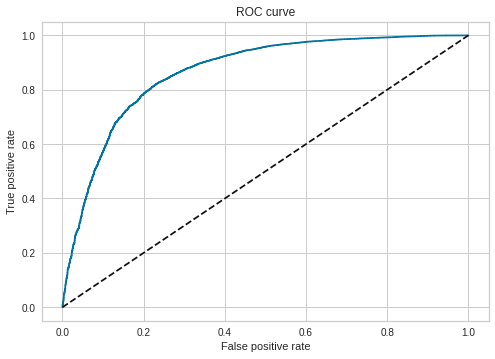

In [ ]:
# dapatkan nilai yang diperlukan untuk memplot kurva ROC
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot ROC curve
plt.plot(fpr, tpr)
# plot garis diagonal sekunder, untuk plot keacakan model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [ ]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.865284398450536

nilai AUROC 0.86 , berarti model cukup bagus

In [ ]:
Gini = AUROC * 2 - 1
Gini

0.7305687969010719

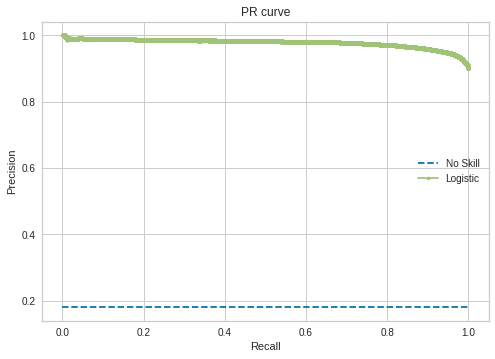

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
# menggambar PR curve
# hitung garis tanpa skill line sebagai proporsi positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot tanpa skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# menghitung inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [ ]:
#cek skor precision recall
auc_pr = auc(recall, precision)
auc_pr

0.9778852920452135

In [ ]:
# menghitung ks statistik
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')

In [ ]:
actual_predicted_probs_df.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
190474,0,0.003483,0
177606,0,0.003978,0
194579,0,0.004638,0
54188,0,0.004705,0
377674,0,0.005026,0


In [ ]:
actual_predicted_probs_df.tail()

,y_test_class_actual,y_hat_test_proba,y_hat_test
240862,1,0.995985,1
171934,1,0.996053,1
252986,1,0.996143,1
250857,1,0.997629,1
251298,1,0.997786,1


In [ ]:
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()

In [ ]:
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()

In [ ]:
actual_predicted_probs_df.head()

,index,y_test_class_actual,y_hat_test_proba,y_hat_test,cum_n_pop,cum_good,cum_bad
0,190474,0,0.003483,0,1,0,1
1,177606,0,0.003978,0,2,0,2
2,194579,0,0.004638,0,3,0,3
3,54188,0,0.004705,0,4,0,4
4,377674,0,0.005026,0,5,0,5


In [ ]:
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())

In [ ]:
actual_predicted_probs_df.head()

,index,y_test_class_actual,y_hat_test_proba,y_hat_test,cum_n_pop,cum_good,cum_bad,cum_n_%,cum_good_%,cum_bad_%
0,190474,0,0.003483,0,1,0,1,0.000028,0.0,0.000274
1,177606,0,0.003978,0,2,0,2,0.000055,0.0,0.000549
2,194579,0,0.004638,0,3,0,3,0.000083,0.0,0.000823
3,54188,0,0.004705,0,4,0,4,0.000110,0.0,0.001098
4,377674,0,0.005026,0,5,0,5,0.000138,0.0,0.001372


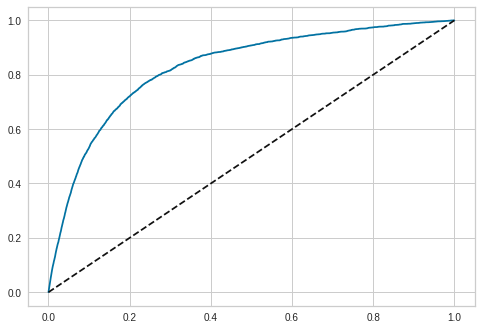

In [ ]:
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

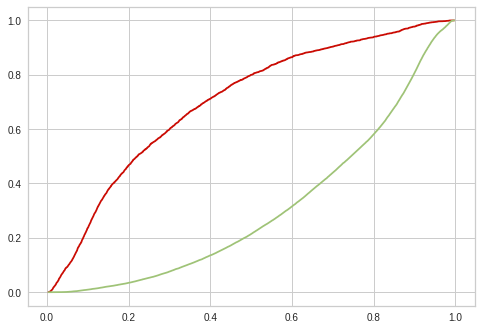

In [ ]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [ ]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print(' KS score adalah',ks)

 KS score adalah 0.5902208530862334


KS Score juga cukup bagus

In [ ]:
# Terakhir Kita akan Menyimpan model dengan pickle
import pickle
filename = 'credit_risk_model.sav'
pickle.dump(model, open(filename, 'wb'))